In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
fifa=pd.read_csv('Clean_Data/SoFifa_data.csv',index_col=0)
fifa

Name  Age  Overall rating  Potential      ID  Height_cm  \
0         Y. Moukoko   18              77         87  240833        179   
1       M. El Arouch   19              66         81  269852        166   
2     Yang Min Hyeok   17              53         68   71106        171   
3             H. Ito   24              78         81  234205        188   
4        N. Mazraoui   25              81         83  236401        183   
...              ...  ...             ...        ...     ...        ...   
5043        E. López   22              67         74  252706        175   
5044         R. Yapi   22              63         72  252707        178   
5045         B. Barr   22              54         57  252756        177   
5046  22 K. Ouattara   22              57         63  252772        174   
5047   R. Neshcheret   21              65         75  252789        190   

      Weight_kg   foot Best position  Growth        Joined  Total attacking  \
0            72   Left            ST      10  Nov 20, 2020              343   
1            64  Right           CAM      15  May 10, 2022              269   
2            61  Right            RM      15  Dec 29, 2023              223   
3            84   Left            CB       3  May 20, 2022              311   
4            65  Right            RM       2   Jul 1, 2022              352   
...         ...    ...           ...     ...           ...              ...   
5043         76  Right            RM       7   Jan 8, 2024              267   
5044         70  Right            RB       9   Sep 1, 2023              205   
5045         71  Right           CAM       3  Feb 14, 2023              208   
5046         69   Left            LB       6   Jan 7, 2020              177   
5047         81  Right            GK      10   Jan 1, 2019               98   

      Crossing  Finishing  Heading accuracy  Short passing  Volleys  \
0           47         79                69             71       77   
1           58         56                32             67       56   
2           52         53                33             43       42   
3           68         48                74             76       45   
4           79         69                65             83       56   
...        ...        ...               ...            ...      ...   
5043        68         46                46             62       45   
5044        56         24                44             50       31   
5045        36         39                41             59       33   
5046        45         30                35             42       25   
5047        10          9                14             56        9   

      Total skill  Dribbling  Curve  FK Accuracy  Long passing  Ball control  \
0             318         79     68           42            48            81   
1             336         73     65           62            64            72   
2             224         61     44           31            37            51   
3             320         68     52           45            80            75   
4             354         83     69           42            76            84   
...           ...        ...    ...          ...           ...           ...   
5043          303         70     55           52            56            70   
5044          220         63     38           27            39            53   
5045          223         53     45           26            44            55   
5046          220         58     40           38            28            56   
5047          110         11     10           12            61            16   

      Total movement  Acceleration  Sprint speed  Agility  Reactions  Balance  \
0                409            82            79       85         77       86   
1                382            77            71       88         58       88   
2                331            67            70       72         39       83   
3                379        

In [4]:
## Always remember there will always be a chance of data leakage so we need to split the data first 
## and then apply feature Engineering

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(fifa,fifa['Value_mill(€)'],test_size=0.1,random_state=0)

In [5]:
X_train.shape,X_test.shape

((4543, 74), (505, 74))

In [6]:
## Missing values

X_train.info()

## No missing values
## I have handled all the missing data in 3_EDA

<class 'pandas.core.frame.DataFrame'>
Index: 4543 entries, 2365 to 2732
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      4543 non-null   object 
 1   Age                       4543 non-null   int64  
 2   Overall rating            4543 non-null   int64  
 3   Potential                 4543 non-null   int64  
 4   ID                        4543 non-null   int64  
 5   Height_cm                 4543 non-null   int64  
 6   Weight_kg                 4543 non-null   int64  
 7   foot                      4543 non-null   object 
 8   Best position             4543 non-null   object 
 9   Growth                    4543 non-null   int64  
 10  Joined                    4543 non-null   object 
 11  Total attacking           4543 non-null   int64  
 12  Crossing                  4543 non-null   int64  
 13  Finishing                 4543 non-null   int64  
 14  Heading ac

In [7]:
data=X_train.copy()
Cat_features=[feature for feature in data.columns if data[feature].dtype=='object']
Var_features=[feature for feature in Cat_features if data[feature].nunique()<748]
Var_features,len(Var_features)

(['foot',
  'Best position',
  'Attacking work rate',
  'Defensive work rate',
  'Body type',
  'PlayStyles +',
  'Team',
  'Contract'],
 8)

In [8]:
for feature in Cat_features:
    print(feature,data[feature].nunique())

Name 4476
foot 2
Best position 15
Joined 1187
Attacking work rate 3
Defensive work rate 3
Body type 10
PlayStyles 1176
PlayStyles + 29
Team 747
Contract 152


In [9]:
## Feature Selection

# Variance threshold
dataset=data[Var_features]
dataset

foot Best position Attacking work rate Defensive work rate  \
2365  Right            ST              Medium                High   
1772  Right            CB              Medium                High   
2219  Right            CB                 Low                High   
910   Right            ST                High                High   
4215  Right            RM              Medium              Medium   
...     ...           ...                 ...                 ...   
4931  Right            RM                High                 Low   
3264  Right            GK              Medium              Medium   
1653  Right           CAM              Medium              Medium   
2607  Right            LB                 Low                High   
2732  Right            ST                High              Medium   

             Body type    PlayStyles +                 Team     Contract  
2365       Lean (185+)  No playstyles+                 RWDM  2024 ~ 2027  
1772       Lean (185+)  No playstyles+              Burnley  2023 ~ 2026  
2219     Normal (185+)  No playstyles+         Norwich City  2023 ~ 2026  
910      Stocky (185+)  No playstyles+          Club Brugge  2023 ~ 2027  
4215  Normal (170-185)  No playstyles+  Hermanos Colmenares  2021 ~ 2022  
...                ...             ...                  ...          ...  
4931    Lean (170-185)  No playstyles+         RKC Waalwijk  2023 ~ 2025  
3264       Lean (185+)  No playstyles+             Juventus  2018 ~ 2025  
1653    Lean (170-185)  No playstyles+     Shakhtar Donetsk  2024 ~ 2028  
2607  Normal (170-185)  No playstyles+     Talleres Córdoba  2023 ~ 2027  
2732     Stocky (185+)  No playstyles+               Celtic  2023 ~ 2028  

[4543 rows x 8 columns]

## Variance Threshold Test

In [10]:
# To apply a variance threshold test to the dataset, we first need to 
# encode the categorical data into numerical values. 

In [11]:
## foot is a nominal feture
## One hot Encoding for foot
dataset=pd.get_dummies(dataset,columns=['foot'],drop_first=True,dtype=int)

In [12]:
dataset

Best position Attacking work rate Defensive work rate         Body type  \
2365            ST              Medium                High       Lean (185+)   
1772            CB              Medium                High       Lean (185+)   
2219            CB                 Low                High     Normal (185+)   
910             ST                High                High     Stocky (185+)   
4215            RM              Medium              Medium  Normal (170-185)   
...            ...                 ...                 ...               ...   
4931            RM                High                 Low    Lean (170-185)   
3264            GK              Medium              Medium       Lean (185+)   
1653           CAM              Medium              Medium    Lean (170-185)   
2607            LB                 Low                High  Normal (170-185)   
2732            ST                High              Medium     Stocky (185+)   

        PlayStyles +                 Team     Contract  foot_Right  
2365  No playstyles+                 RWDM  2024 ~ 2027           1  
1772  No playstyles+              Burnley  2023 ~ 2026           1  
2219  No playstyles+         Norwich City  2023 ~ 2026           1  
910   No playstyles+          Club Brugge  2023 ~ 2027           1  
4215  No playstyles+  Hermanos Colmenares  2021 ~ 2022           1  
...              ...                  ...          ...         ...  
4931  No playstyles+         RKC Waalwijk  2023 ~ 2025           1  
3264  No playstyles+             Juventus  2018 ~ 2025           1  
1653  No playstyles+     Shakhtar Donetsk  2024 ~ 2028           1  
2607  No playstyles+     Talleres Córdoba  2023 ~ 2027           1  
2732  No playstyles+               Celtic  2023 ~ 2028           1  

[4543 rows x 8 columns]

In [13]:
dataset=pd.concat([dataset,data['Value_mill(€)']],axis=1)
dataset

Best position Attacking work rate Defensive work rate         Body type  \
2365            ST              Medium                High       Lean (185+)   
1772            CB              Medium                High       Lean (185+)   
2219            CB                 Low                High     Normal (185+)   
910             ST                High                High     Stocky (185+)   
4215            RM              Medium              Medium  Normal (170-185)   
...            ...                 ...                 ...               ...   
4931            RM                High                 Low    Lean (170-185)   
3264            GK              Medium              Medium       Lean (185+)   
1653           CAM              Medium              Medium    Lean (170-185)   
2607            LB                 Low                High  Normal (170-185)   
2732            ST                High              Medium     Stocky (185+)   

        PlayStyles +                 Team     Contract  foot_Right  \
2365  No playstyles+                 RWDM  2024 ~ 2027           1   
1772  No playstyles+              Burnley  2023 ~ 2026           1   
2219  No playstyles+         Norwich City  2023 ~ 2026           1   
910   No playstyles+          Club Brugge  2023 ~ 2027           1   
4215  No playstyles+  Hermanos Colmenares  2021 ~ 2022           1   
...              ...                  ...          ...         ...   
4931  No playstyles+         RKC Waalwijk  2023 ~ 2025           1   
3264  No playstyles+             Juventus  2018 ~ 2025           1   
1653  No playstyles+     Shakhtar Donetsk  2024 ~ 2028           1   
2607  No playstyles+     Talleres Córdoba  2023 ~ 2027           1   
2732  No playstyles+               Celtic  2023 ~ 2028           1   

      Value_mill(€)  
2365          0.825  
1772          4.900  
2219          2.100  
910           9.000  
4215          0.975  
...             ...  
4931          2.300  
3264         11.500  
1653          3.300  
2607          3.500  
2732          2.900  

[4543 rows x 9 columns]

In [14]:
dataset['Best position'].value_counts()

Best position
CAM    794
CB     787
ST     683
GK     366
RM     350
CM     329
CDM    297
LM     225
RB     203
LB     181
RWB     93
LWB     86
RW      65
LW      59
CF      25
Name: count, dtype: int64

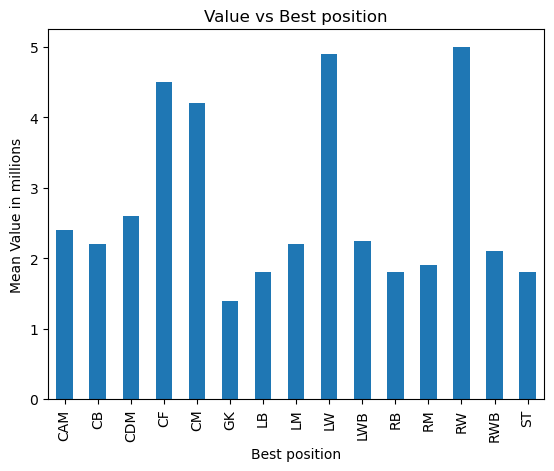

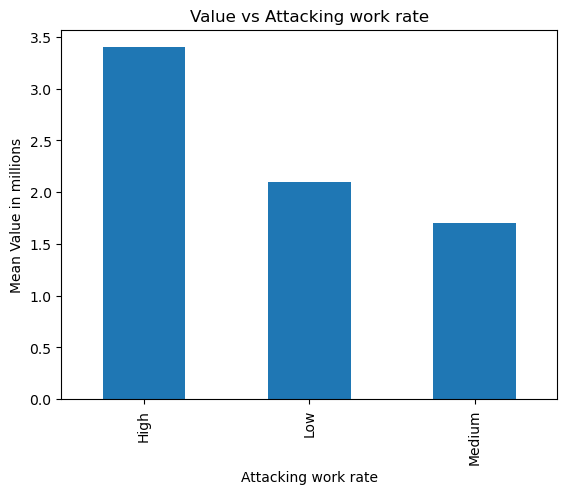

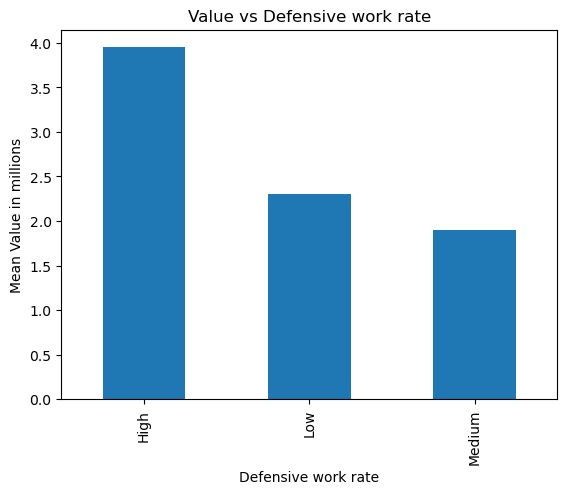

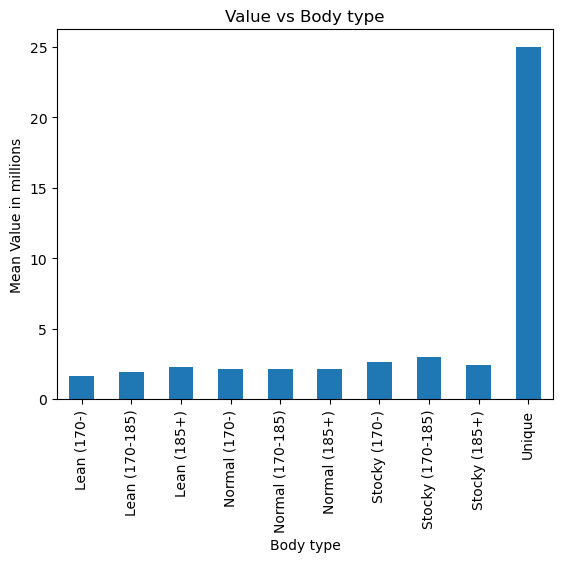

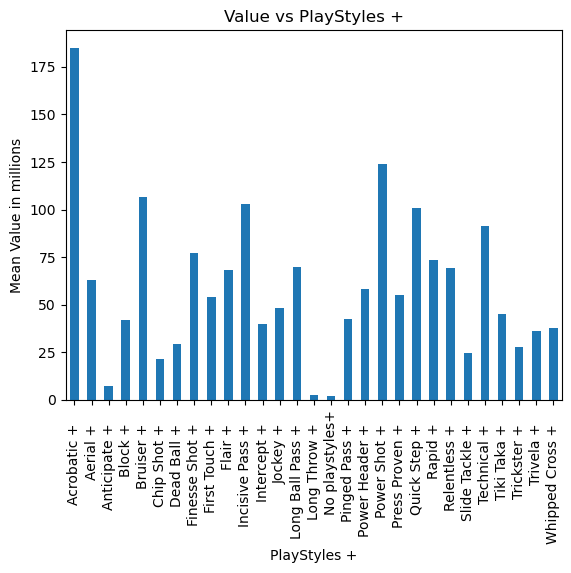

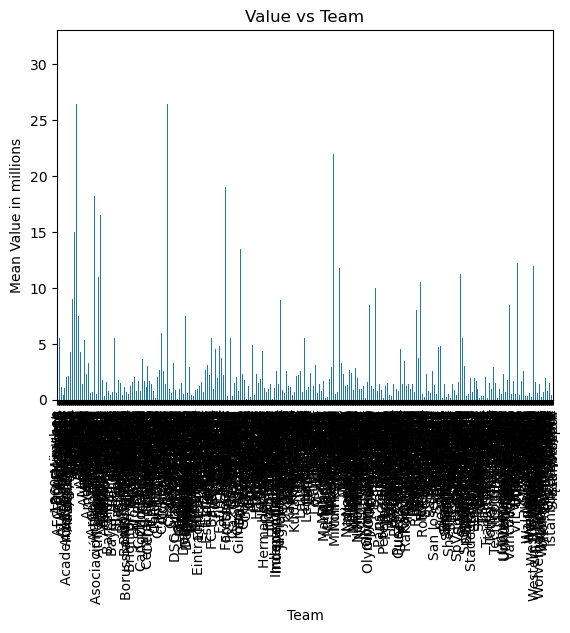

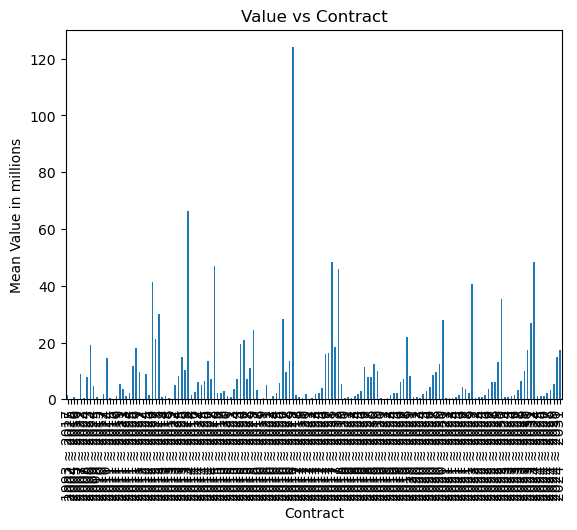

KeyError: 'foot_Right'

In [15]:
for feature in dataset.columns:
    data.groupby(feature)['Value_mill(€)'].median().plot.bar()
    plt.ylabel('Mean Value in millions')
    plt.title('Value vs {}'.format(feature))
#     plt.xticks(rotation=60)
    plt.show()

In [16]:
##  Best position is a nominal feature 
##  One hot Encoding for best position

dataset=pd.get_dummies(dataset,columns=['Best position'],drop_first=True,dtype=int)
dataset
# temp=dataset.groupby('Best position')['Value_mill(€)'].mean().sort_values()
# print(temp)
# temp_df=temp.index
# print(temp_df)
# temp_df={k:i for i,k in enumerate(temp_df)}
# print(temp_df)
# dataset['Best position']=dataset['Best position'].map(temp_df)

Attacking work rate Defensive work rate         Body type  \
2365              Medium                High       Lean (185+)   
1772              Medium                High       Lean (185+)   
2219                 Low                High     Normal (185+)   
910                 High                High     Stocky (185+)   
4215              Medium              Medium  Normal (170-185)   
...                  ...                 ...               ...   
4931                High                 Low    Lean (170-185)   
3264              Medium              Medium       Lean (185+)   
1653              Medium              Medium    Lean (170-185)   
2607                 Low                High  Normal (170-185)   
2732                High              Medium     Stocky (185+)   

        PlayStyles +                 Team     Contract  foot_Right  \
2365  No playstyles+                 RWDM  2024 ~ 2027           1   
1772  No playstyles+              Burnley  2023 ~ 2026           1   
2219  No playstyles+         Norwich City  2023 ~ 2026           1   
910   No playstyles+          Club Brugge  2023 ~ 2027           1   
4215  No playstyles+  Hermanos Colmenares  2021 ~ 2022           1   
...              ...                  ...          ...         ...   
4931  No playstyles+         RKC Waalwijk  2023 ~ 2025           1   
3264  No playstyles+             Juventus  2018 ~ 2025           1   
1653  No playstyles+     Shakhtar Donetsk  2024 ~ 2028           1   
2607  No playstyles+     Talleres Córdoba  2023 ~ 2027           1   
2732  No playstyles+               Celtic  2023 ~ 2028           1   

      Value_mill(€)  Best position_CB  Best position_CDM  Best position_CF  \
2365          0.825                 0                  0                 0   
1772          4.900                 1                  0                 0   
2219          2.100                 1                  0                 0   
910           9.000                 0                  0                 0   
4215          0.975                 0                  0                 0   
...             ...               ...                ...               ...   
4931          2.300                 0                  0                 0   
3264         11.500                 0                  0                 0   
1653          3.300                 0                  0                 0   
2607          3.500                 0                  0                 0   
2732          2.900                 0                  0                 0   

      Best position_CM  Best position_GK  Best position_LB  Best position_LM  \
2365                 0                 0                 0                 0   
1772                 0                 0                 0                 0   
2219                 0                 0                 0                 0   
910                  0                 0                 0                 0   
4215                 0                 0                 0                 0   
...                ...               ...               ...               ...   
4931                 0                 0                 0                 0   
3264                 0                 1                 0                 0   
1653                 0                 0                 0                 0   
2607                 0                 0                 1                 0   
2732                 0                 0                 0                 0   

      Best position_LW  Best position_LWB  Best position_RB  Best position_RM  \
2365                 0                  0                 0                 0   
1772                 0                  0                 0                 0   
2219                 0                  0                 0                 0   
910                  0                  0                 0                 0   
4215                 0                  0                 0         

In [17]:
## Att and Def Work Rate are ordinal features
## Label Encoding for AttWorkRate and DefWorkRate

enc_map={'Low':0,'Medium':1,'High':2}

dataset['Attacking work rate']=dataset['Attacking work rate'].map(enc_map)
dataset['Defensive work rate']=dataset['Defensive work rate'].map(enc_map)
dataset

Attacking work rate  Defensive work rate         Body type  \
2365                    1                    2       Lean (185+)   
1772                    1                    2       Lean (185+)   
2219                    0                    2     Normal (185+)   
910                     2                    2     Stocky (185+)   
4215                    1                    1  Normal (170-185)   
...                   ...                  ...               ...   
4931                    2                    0    Lean (170-185)   
3264                    1                    1       Lean (185+)   
1653                    1                    1    Lean (170-185)   
2607                    0                    2  Normal (170-185)   
2732                    2                    1     Stocky (185+)   

        PlayStyles +                 Team     Contract  foot_Right  \
2365  No playstyles+                 RWDM  2024 ~ 2027           1   
1772  No playstyles+              Burnley  2023 ~ 2026           1   
2219  No playstyles+         Norwich City  2023 ~ 2026           1   
910   No playstyles+          Club Brugge  2023 ~ 2027           1   
4215  No playstyles+  Hermanos Colmenares  2021 ~ 2022           1   
...              ...                  ...          ...         ...   
4931  No playstyles+         RKC Waalwijk  2023 ~ 2025           1   
3264  No playstyles+             Juventus  2018 ~ 2025           1   
1653  No playstyles+     Shakhtar Donetsk  2024 ~ 2028           1   
2607  No playstyles+     Talleres Córdoba  2023 ~ 2027           1   
2732  No playstyles+               Celtic  2023 ~ 2028           1   

      Value_mill(€)  Best position_CB  Best position_CDM  Best position_CF  \
2365          0.825                 0                  0                 0   
1772          4.900                 1                  0                 0   
2219          2.100                 1                  0                 0   
910           9.000                 0                  0                 0   
4215          0.975                 0                  0                 0   
...             ...               ...                ...               ...   
4931          2.300                 0                  0                 0   
3264         11.500                 0                  0                 0   
1653          3.300                 0                  0                 0   
2607          3.500                 0                  0                 0   
2732          2.900                 0                  0                 0   

      Best position_CM  Best position_GK  Best position_LB  Best position_LM  \
2365                 0                 0                 0                 0   
1772                 0                 0                 0                 0   
2219                 0                 0                 0                 0   
910                  0                 0                 0                 0   
4215                 0                 0                 0                 0   
...                ...               ...               ...               ...   
4931                 0                 0                 0                 0   
3264                 0                 1                 0                 0   
1653                 0                 0                 0                 0   
2607                 0                 0                 1                 0   
2732                 0                 0                 0                 0   

      Best position_LW  Best position_LWB  Best position_RB  Best position_RM  \
2365                 0                  0                 0                 0   
1772                 0                  0                 0                 0   
2219                 0                  0                 0                 0   
910                  0                  0                 0                 0   
4215                 0                  0    

In [18]:
dataset['Body type'].value_counts()

Body type
Normal (170-185)    1382
Lean (170-185)      1066
Normal (185+)        884
Lean (185+)          573
Normal (170-)        162
Stocky (170-185)     131
Unique               121
Stocky (185+)        109
Lean (170-)           98
Stocky (170-)         17
Name: count, dtype: int64

In [19]:
## bodytype is a nominal feature
## one hot encoding for bodytype

dataset=pd.get_dummies(dataset,columns=['Body type'],drop_first=True,dtype=int)
dataset
# temp=dataset['Body type'].value_counts()
# print(temp)
# temp_df=temp.index
# print(temp_df)
# temp_df={k:i for i,k in enumerate(temp_df)}
# print(temp_df)
# dataset['Body type']=dataset['Body type'].map(temp_df)

Attacking work rate  Defensive work rate    PlayStyles +  \
2365                    1                    2  No playstyles+   
1772                    1                    2  No playstyles+   
2219                    0                    2  No playstyles+   
910                     2                    2  No playstyles+   
4215                    1                    1  No playstyles+   
...                   ...                  ...             ...   
4931                    2                    0  No playstyles+   
3264                    1                    1  No playstyles+   
1653                    1                    1  No playstyles+   
2607                    0                    2  No playstyles+   
2732                    2                    1  No playstyles+   

                     Team     Contract  foot_Right  Value_mill(€)  \
2365                 RWDM  2024 ~ 2027           1          0.825   
1772              Burnley  2023 ~ 2026           1          4.900   
2219         Norwich City  2023 ~ 2026           1          2.100   
910           Club Brugge  2023 ~ 2027           1          9.000   
4215  Hermanos Colmenares  2021 ~ 2022           1          0.975   
...                   ...          ...         ...            ...   
4931         RKC Waalwijk  2023 ~ 2025           1          2.300   
3264             Juventus  2018 ~ 2025           1         11.500   
1653     Shakhtar Donetsk  2024 ~ 2028           1          3.300   
2607     Talleres Córdoba  2023 ~ 2027           1          3.500   
2732               Celtic  2023 ~ 2028           1          2.900   

      Best position_CB  Best position_CDM  Best position_CF  Best position_CM  \
2365                 0                  0                 0                 0   
1772                 1                  0                 0                 0   
2219                 1                  0                 0                 0   
910                  0                  0                 0                 0   
4215                 0                  0                 0                 0   
...                ...                ...               ...               ...   
4931                 0                  0                 0                 0   
3264                 0                  0                 0                 0   
1653                 0                  0                 0                 0   
2607                 0                  0                 0                 0   
2732                 0                  0                 0                 0   

      Best position_GK  Best position_LB  Best position_LM  Best position_LW  \
2365                 0                 0                 0                 0   
1772                 0                 0                 0                 0   
2219                 0                 0                 0                 0   
910                  0                 0                 0                 0   
4215                 0                 0                 0                 0   
...                ...               ...               ...               ...   
4931                 0                 0                 0                 0   
3264                 1                 0                 0                 0   
1653                 0                 0                 0                 0   
2607                 0                 1                 0                 0   
2732                 0                 0                 0                 0   

      Best position_LWB  Best position_RB  Best position_RM  Best position_RW  \
2365                  0                 0                 0                 0   
1772                  0                 0                 0                 0   
2219                  0                 0                 0                 0   
910                   0                 0                 0                 0   
4215                  0                 0    

Text(0.5, 1.0, 'Value vs PlayStyles +')

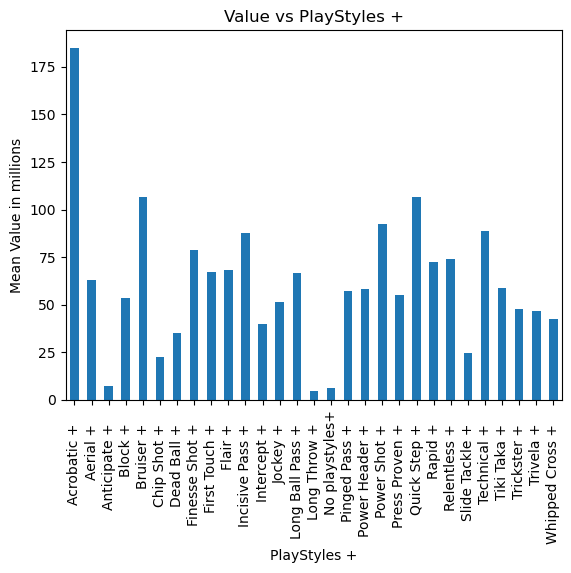

In [20]:
data.groupby('PlayStyles +')['Value_mill(€)'].mean().plot.bar()
plt.ylabel('Mean Value in millions')
plt.title('Value vs PlayStyles +')

In [21]:
print(dataset['PlayStyles +'].value_counts())

## I'm converting all the playStyles + as unique
## Pinged Pass, Long throw, all -> 'unique PlayStyle +'

dataset['PlayStyles +']=np.where(dataset['PlayStyles +']=='No playstyles+',dataset['PlayStyles +'],'Unique playstyles+')
print(dataset['PlayStyles +'].value_counts())

PlayStyles +
No playstyles+       4458
Pinged Pass +           6
Long Throw +            5
Trickster +             5
Relentless +            4
Block +                 4
Dead Ball +             4
Quick Step +            4
Press Proven +          4
Chip Shot +             4
Rapid +                 4
Trivela +               4
Finesse Shot +          3
First Touch +           3
Technical +             3
Tiki Taka +             3
Power Shot +            3
Jockey +                3
Whipped Cross +         3
Incisive Pass +         3
Long Ball Pass +        3
Intercept +             2
Aerial +                2
Flair +                 1
Anticipate +            1
Acrobatic +             1
Slide Tackle +          1
Bruiser +               1
Power Header +          1
Name: count, dtype: int64
PlayStyles +
No playstyles+        4458
Unique playstyles+      85
Name: count, dtype: int64


In [22]:
## Playstyles+ is a nominal feature
## one hot encoding for playstyles+

dataset=pd.get_dummies(dataset,columns=['PlayStyles +'],drop_first=True,dtype=int)

# temp=dataset.groupby('PlayStyles +')['Value_mill(€)'].mean().sort_values()
# print(temp)
# temp_df=temp.index
# print(temp_df)
# temp_df={k:i for i,k in enumerate(temp_df)}
# print(temp_df)
# dataset['PlayStyles +']=dataset['PlayStyles +'].map(temp_df)

In [23]:
dataset

Attacking work rate  Defensive work rate                 Team  \
2365                    1                    2                 RWDM   
1772                    1                    2              Burnley   
2219                    0                    2         Norwich City   
910                     2                    2          Club Brugge   
4215                    1                    1  Hermanos Colmenares   
...                   ...                  ...                  ...   
4931                    2                    0         RKC Waalwijk   
3264                    1                    1             Juventus   
1653                    1                    1     Shakhtar Donetsk   
2607                    0                    2     Talleres Córdoba   
2732                    2                    1               Celtic   

         Contract  foot_Right  Value_mill(€)  Best position_CB  \
2365  2024 ~ 2027           1          0.825                 0   
1772  2023 ~ 2026           1          4.900                 1   
2219  2023 ~ 2026           1          2.100                 1   
910   2023 ~ 2027           1          9.000                 0   
4215  2021 ~ 2022           1          0.975                 0   
...           ...         ...            ...               ...   
4931  2023 ~ 2025           1          2.300                 0   
3264  2018 ~ 2025           1         11.500                 0   
1653  2024 ~ 2028           1          3.300                 0   
2607  2023 ~ 2027           1          3.500                 0   
2732  2023 ~ 2028           1          2.900                 0   

      Best position_CDM  Best position_CF  Best position_CM  Best position_GK  \
2365                  0                 0                 0                 0   
1772                  0                 0                 0                 0   
2219                  0                 0                 0                 0   
910                   0                 0                 0                 0   
4215                  0                 0                 0                 0   
...                 ...               ...               ...               ...   
4931                  0                 0                 0                 0   
3264                  0                 0                 0                 1   
1653                  0                 0                 0                 0   
2607                  0                 0                 0                 0   
2732                  0                 0                 0                 0   

      Best position_LB  Best position_LM  Best position_LW  Best position_LWB  \
2365                 0                 0                 0                  0   
1772                 0                 0                 0                  0   
2219                 0                 0                 0                  0   
910                  0                 0                 0                  0   
4215                 0                 0                 0                  0   
...                ...               ...               ...                ...   
4931                 0                 0                 0                  0   
3264                 0                 0                 0                  0   
1653                 0                 0                 0                  0   
2607                 1                 0                 0                  0   
2732                 0                 0                 0                  0   

      Best position_RB  Best position_RM  Best position_RW  Best position_RWB  \
2365                 0                 0                 0                  0   
1772                 0                 0                 0                  0   
2219                 0                 0                 0                  0   
910                  0                 0                 0                  0   
4215     

In [24]:
## I am treating team as an ordinal feature
## encoding for team
temp=dataset.groupby('Team')['Value_mill(€)'].mean().sort_values()
print(temp)
temp_df=temp.to_dict()
print(temp_df)
dataset['Team']=dataset['Team'].map(temp_df)

Team
Guangzhou City          0.035000
Guangzhou               0.070000
Gimnàstic Tarragona     0.070000
Qingdao FC              0.070000
Hvidovre                0.080000
                         ...    
Inter                  31.868056
FC Bayern München      35.721875
Paris Saint Germain    36.855357
Real Madrid            37.880357
Manchester City        42.386379
Name: Value_mill(€), Length: 747, dtype: float64
{'Guangzhou City': 0.035, 'Guangzhou': 0.07, 'Gimnàstic Tarragona': 0.07, 'Qingdao FC': 0.07, 'Hvidovre': 0.08, 'Dalian Professional': 0.08166666666666667, 'NorthEast United': 0.11, 'Hyderabad': 0.11, 'Thun': 0.11, 'Zhejiang': 0.12, 'Shelbourne': 0.13, 'Arsenal de Sarandi': 0.13, 'Salford City': 0.13, 'Sutton United': 0.1366666666666667, 'Fénix': 0.14, 'East Bengal': 0.14500000000000002, 'UCD': 0.163, 'Jamshedpur': 0.17, 'Seongnam': 0.17, 'Walsall': 0.17250000000000001, 'Mansfield Town': 0.18, 'Odd': 0.18, 'Podbeskidzie': 0.18, 'Derry City': 0.2, 'Ruch Chorzów': 0.21, 'Górnik 

In [25]:
dataset

Attacking work rate  Defensive work rate       Team     Contract  \
2365                    1                    2   1.412500  2024 ~ 2027   
1772                    1                    2   4.237500  2023 ~ 2026   
2219                    0                    2   3.100000  2023 ~ 2026   
910                     2                    2   7.350000  2023 ~ 2027   
4215                    1                    1   0.975000  2021 ~ 2022   
...                   ...                  ...        ...          ...   
4931                    2                    0   1.125000  2023 ~ 2025   
3264                    1                    1  19.266667  2018 ~ 2025   
1653                    1                    1   4.393750  2024 ~ 2028   
2607                    0                    2   4.722222  2023 ~ 2027   
2732                    2                    1   5.626786  2023 ~ 2028   

      foot_Right  Value_mill(€)  Best position_CB  Best position_CDM  \
2365           1          0.825                 0                  0   
1772           1          4.900                 1                  0   
2219           1          2.100                 1                  0   
910            1          9.000                 0                  0   
4215           1          0.975                 0                  0   
...          ...            ...               ...                ...   
4931           1          2.300                 0                  0   
3264           1         11.500                 0                  0   
1653           1          3.300                 0                  0   
2607           1          3.500                 0                  0   
2732           1          2.900                 0                  0   

      Best position_CF  Best position_CM  Best position_GK  Best position_LB  \
2365                 0                 0                 0                 0   
1772                 0                 0                 0                 0   
2219                 0                 0                 0                 0   
910                  0                 0                 0                 0   
4215                 0                 0                 0                 0   
...                ...               ...               ...               ...   
4931                 0                 0                 0                 0   
3264                 0                 0                 1                 0   
1653                 0                 0                 0                 0   
2607                 0                 0                 0                 1   
2732                 0                 0                 0                 0   

      Best position_LM  Best position_LW  Best position_LWB  Best position_RB  \
2365                 0                 0                  0                 0   
1772                 0                 0                  0                 0   
2219                 0                 0                  0                 0   
910                  0                 0                  0                 0   
4215                 0                 0                  0                 0   
...                ...               ...                ...               ...   
4931                 0                 0                  0                 0   
3264                 0                 0                  0                 0   
1653                 0                 0                  0                 0   
2607                 0                 0                  0                 0   
2732                 0                 0                  0                 0   

      Best position_RM  Best position_RW  Best position_RWB  Best position_ST  \
2365                 0                 0                  0                 1   
1772                 0                 0                  0                 0   
2219                 0                 0                  0                

In [26]:
## Splitting contract in 2 features ContStart-ContEnd

data=dataset.copy()

data[['ContStart','ContEnd']]=data['Contract'].str.replace(' ','').str.split('~',expand=True)

In [27]:
data.drop(columns='Contract',inplace=True)
data

Attacking work rate  Defensive work rate       Team  foot_Right  \
2365                    1                    2   1.412500           1   
1772                    1                    2   4.237500           1   
2219                    0                    2   3.100000           1   
910                     2                    2   7.350000           1   
4215                    1                    1   0.975000           1   
...                   ...                  ...        ...         ...   
4931                    2                    0   1.125000           1   
3264                    1                    1  19.266667           1   
1653                    1                    1   4.393750           1   
2607                    0                    2   4.722222           1   
2732                    2                    1   5.626786           1   

      Value_mill(€)  Best position_CB  Best position_CDM  Best position_CF  \
2365          0.825                 0                  0                 0   
1772          4.900                 1                  0                 0   
2219          2.100                 1                  0                 0   
910           9.000                 0                  0                 0   
4215          0.975                 0                  0                 0   
...             ...               ...                ...               ...   
4931          2.300                 0                  0                 0   
3264         11.500                 0                  0                 0   
1653          3.300                 0                  0                 0   
2607          3.500                 0                  0                 0   
2732          2.900                 0                  0                 0   

      Best position_CM  Best position_GK  Best position_LB  Best position_LM  \
2365                 0                 0                 0                 0   
1772                 0                 0                 0                 0   
2219                 0                 0                 0                 0   
910                  0                 0                 0                 0   
4215                 0                 0                 0                 0   
...                ...               ...               ...               ...   
4931                 0                 0                 0                 0   
3264                 0                 1                 0                 0   
1653                 0                 0                 0                 0   
2607                 0                 0                 1                 0   
2732                 0                 0                 0                 0   

      Best position_LW  Best position_LWB  Best position_RB  Best position_RM  \
2365                 0                  0                 0                 0   
1772                 0                  0                 0                 0   
2219                 0                  0                 0                 0   
910                  0                  0                 0                 0   
4215                 0                  0                 0                 1   
...                ...                ...               ...               ...   
4931                 0                  0                 0                 1   
3264                 0                  0                 0                 0   
1653                 0                  0                 0                 0   
2607                 0                  0                 0                 0   
2732                 0                  0                 0                 0   

      Best position_RW  Best position_RWB  Best position_ST  \
2365                 0                  0                 1   
1772                 0                  0                 0   
2219                 0                  0                 0   
910   

In [28]:
## After this 2 new features ContLength and ContRemaining

print(data[['ContStart','ContEnd']].dtypes)
print(data['ContStart'].unique())
print(data['ContEnd'].unique())


data['ContLength']=data['ContEnd'].astype(int)-data['ContStart'].astype(int)+1
data['ContRemaining']=data['ContEnd'].astype(int)-2024+1


ContStart    object
ContEnd      object
dtype: object
['2024' '2023' '2021' '2022' '2018' '2019' '2020' '2017' '2015' '2011'
 '2016' '2012' '2013' '2014' '2004' '2009' '2002' '2010' '2005' '1993'
 '2008' '2007']
['2027' '2026' '2022' '2028' '2025' '2024' '2021' '2023' '2013' '2019'
 '2029' '2016' '2030' '2017' '2020' '2014' '2015' '2032' '2031' '2018']


In [29]:
data

Attacking work rate  Defensive work rate       Team  foot_Right  \
2365                    1                    2   1.412500           1   
1772                    1                    2   4.237500           1   
2219                    0                    2   3.100000           1   
910                     2                    2   7.350000           1   
4215                    1                    1   0.975000           1   
...                   ...                  ...        ...         ...   
4931                    2                    0   1.125000           1   
3264                    1                    1  19.266667           1   
1653                    1                    1   4.393750           1   
2607                    0                    2   4.722222           1   
2732                    2                    1   5.626786           1   

      Value_mill(€)  Best position_CB  Best position_CDM  Best position_CF  \
2365          0.825                 0                  0                 0   
1772          4.900                 1                  0                 0   
2219          2.100                 1                  0                 0   
910           9.000                 0                  0                 0   
4215          0.975                 0                  0                 0   
...             ...               ...                ...               ...   
4931          2.300                 0                  0                 0   
3264         11.500                 0                  0                 0   
1653          3.300                 0                  0                 0   
2607          3.500                 0                  0                 0   
2732          2.900                 0                  0                 0   

      Best position_CM  Best position_GK  Best position_LB  Best position_LM  \
2365                 0                 0                 0                 0   
1772                 0                 0                 0                 0   
2219                 0                 0                 0                 0   
910                  0                 0                 0                 0   
4215                 0                 0                 0                 0   
...                ...               ...               ...               ...   
4931                 0                 0                 0                 0   
3264                 0                 1                 0                 0   
1653                 0                 0                 0                 0   
2607                 0                 0                 1                 0   
2732                 0                 0                 0                 0   

      Best position_LW  Best position_LWB  Best position_RB  Best position_RM  \
2365                 0                  0                 0                 0   
1772                 0                  0                 0                 0   
2219                 0                  0                 0                 0   
910                  0                  0                 0                 0   
4215                 0                  0                 0                 1   
...                ...                ...               ...               ...   
4931                 0                  0                 0                 1   
3264                 0                  0                 0                 0   
1653                 0                  0                 0                 0   
2607                 0                  0                 0                 0   
2732                 0                  0                 0                 0   

      Best position_RW  Best position_RWB  Best position_ST  \
2365                 0                  0                 1   
1772                 0                  0                 0   
2219                 0                  0                 0   
910   

In [30]:
data['ContRemaining'].value_counts()

ContRemaining
 2     983
 1     965
 3     963
 4     816
 5     451
 0     154
-1      75
 6      37
-2      34
-4      12
 7      12
-7       9
-3       9
-6       6
-5       5
 8       4
-9       3
-8       2
 9       2
-10      1
Name: count, dtype: int64

In [31]:
## Removing ContStart and ContEnd
dataset=data.copy()
dataset.drop(columns=['ContStart','ContEnd'],inplace=True,axis=1)
dataset

Attacking work rate  Defensive work rate       Team  foot_Right  \
2365                    1                    2   1.412500           1   
1772                    1                    2   4.237500           1   
2219                    0                    2   3.100000           1   
910                     2                    2   7.350000           1   
4215                    1                    1   0.975000           1   
...                   ...                  ...        ...         ...   
4931                    2                    0   1.125000           1   
3264                    1                    1  19.266667           1   
1653                    1                    1   4.393750           1   
2607                    0                    2   4.722222           1   
2732                    2                    1   5.626786           1   

      Value_mill(€)  Best position_CB  Best position_CDM  Best position_CF  \
2365          0.825                 0                  0                 0   
1772          4.900                 1                  0                 0   
2219          2.100                 1                  0                 0   
910           9.000                 0                  0                 0   
4215          0.975                 0                  0                 0   
...             ...               ...                ...               ...   
4931          2.300                 0                  0                 0   
3264         11.500                 0                  0                 0   
1653          3.300                 0                  0                 0   
2607          3.500                 0                  0                 0   
2732          2.900                 0                  0                 0   

      Best position_CM  Best position_GK  Best position_LB  Best position_LM  \
2365                 0                 0                 0                 0   
1772                 0                 0                 0                 0   
2219                 0                 0                 0                 0   
910                  0                 0                 0                 0   
4215                 0                 0                 0                 0   
...                ...               ...               ...               ...   
4931                 0                 0                 0                 0   
3264                 0                 1                 0                 0   
1653                 0                 0                 0                 0   
2607                 0                 0                 1                 0   
2732                 0                 0                 0                 0   

      Best position_LW  Best position_LWB  Best position_RB  Best position_RM  \
2365                 0                  0                 0                 0   
1772                 0                  0                 0                 0   
2219                 0                  0                 0                 0   
910                  0                  0                 0                 0   
4215                 0                  0                 0                 1   
...                ...                ...               ...               ...   
4931                 0                  0                 0                 1   
3264                 0                  0                 0                 0   
1653                 0                  0                 0                 0   
2607                 0                  0                 0                 0   
2732                 0                  0                 0                 0   

      Best position_RW  Best position_RWB  Best position_ST  \
2365                 0                  0                 1   
1772                 0                  0                 0   
2219                 0                  0                 0   
910   

In [32]:
Var=[]
print(np.var(dataset,axis=0))

Attacking work rate                  0.304956
Defensive work rate                  0.292097
Team                                70.566107
foot_Right                           0.193747
Value_mill(€)                      182.257905
Best position_CB                     0.143224
Best position_CDM                    0.061101
Best position_CF                     0.005473
Best position_CM                     0.067175
Best position_GK                     0.074073
Best position_LB                     0.038254
Best position_LM                     0.047074
Best position_LW                     0.012818
Best position_LWB                    0.018572
Best position_RB                     0.042687
Best position_RM                     0.071106
Best position_RW                     0.014103
Best position_RWB                    0.020052
Best position_ST                     0.127739
Body type_Lean (170-185)             0.179588
Body type_Lean (185+)                0.110220
Body type_Normal (170-)           

Attacking work rate                0.165313
Defensive work rate                0.132406
Team                               0.622236
foot_Right                        -0.016599
Value_mill(€)                      1.000000
Best position_CB                  -0.005976
Best position_CDM                  0.013695
Best position_CF                   0.026652
Best position_CM                   0.097325
Best position_GK                  -0.021855
Best position_LB                  -0.023067
Best position_LM                  -0.014786
Best position_LW                   0.052889
Best position_LWB                 -0.006624
Best position_RB                  -0.042221
Best position_RM                  -0.046248
Best position_RW                   0.034258
Best position_RWB                 -0.024019
Best position_ST                  -0.024071
Body type_Lean (170-185)          -0.041690
Body type_Lean (185+)             -0.011907
Body type_Normal (170-)           -0.015303
Body type_Normal (170-185)      

<Axes: >

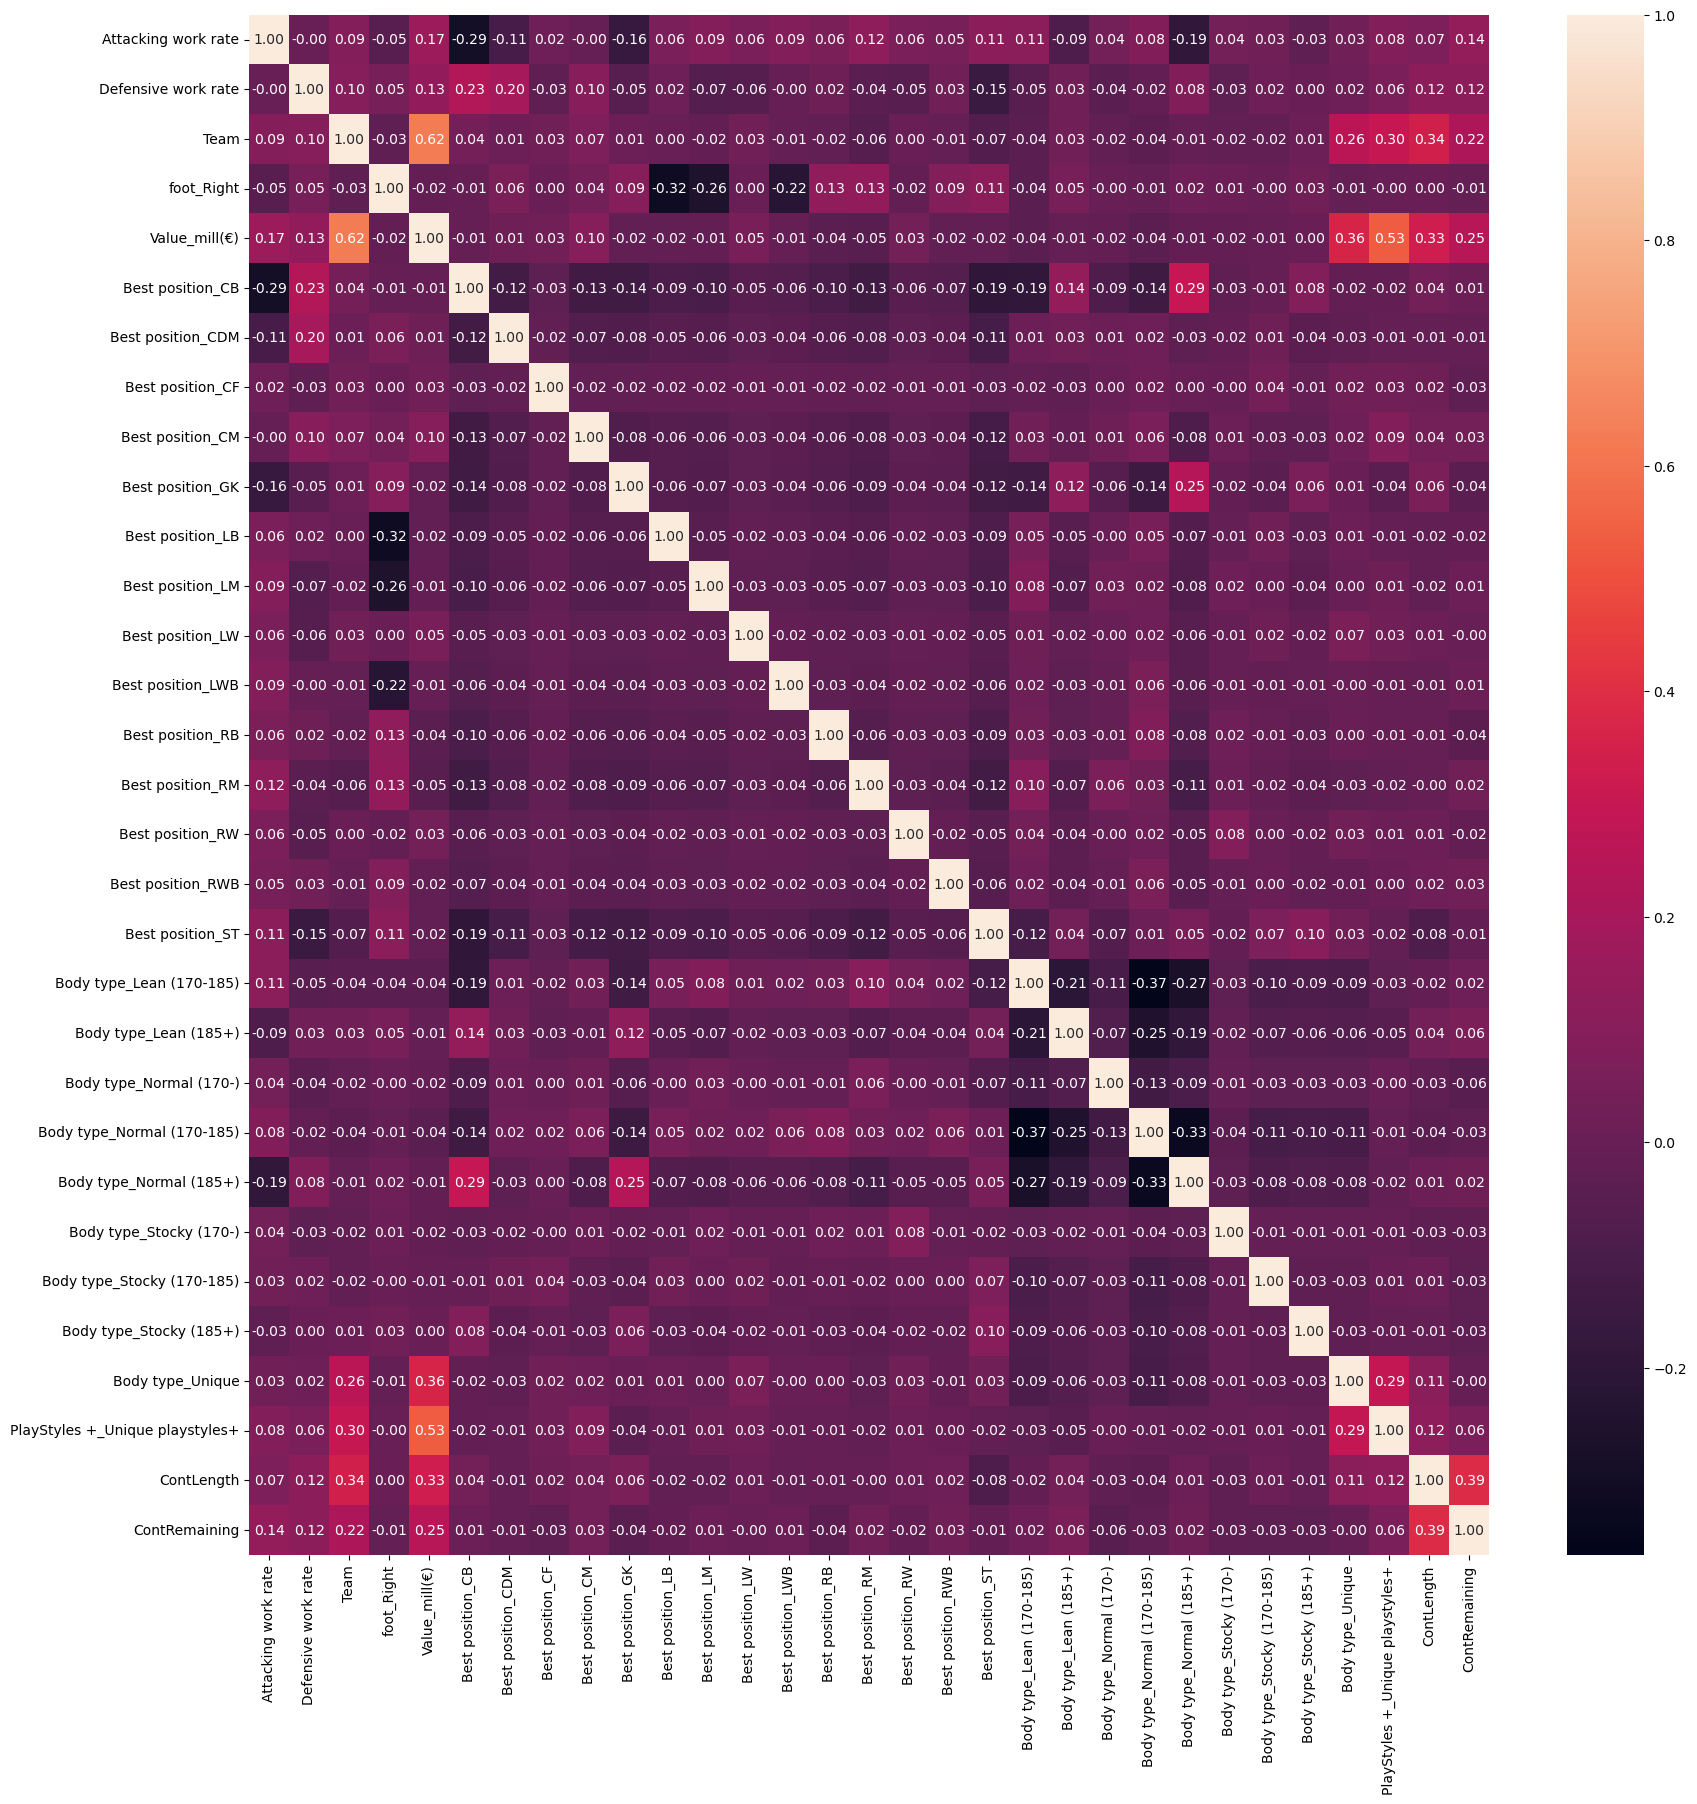

In [33]:
## Correlation

corr=dataset.corr()
print(corr['Value_mill(€)'])
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.2f')

In [34]:
## Interaction term
data_new=dataset.copy()
data_new['AttDef']=(data_new['Attacking work rate']+data_new['Defensive work rate'])/2
data_new

Attacking work rate  Defensive work rate       Team  foot_Right  \
2365                    1                    2   1.412500           1   
1772                    1                    2   4.237500           1   
2219                    0                    2   3.100000           1   
910                     2                    2   7.350000           1   
4215                    1                    1   0.975000           1   
...                   ...                  ...        ...         ...   
4931                    2                    0   1.125000           1   
3264                    1                    1  19.266667           1   
1653                    1                    1   4.393750           1   
2607                    0                    2   4.722222           1   
2732                    2                    1   5.626786           1   

      Value_mill(€)  Best position_CB  Best position_CDM  Best position_CF  \
2365          0.825                 0                  0                 0   
1772          4.900                 1                  0                 0   
2219          2.100                 1                  0                 0   
910           9.000                 0                  0                 0   
4215          0.975                 0                  0                 0   
...             ...               ...                ...               ...   
4931          2.300                 0                  0                 0   
3264         11.500                 0                  0                 0   
1653          3.300                 0                  0                 0   
2607          3.500                 0                  0                 0   
2732          2.900                 0                  0                 0   

      Best position_CM  Best position_GK  Best position_LB  Best position_LM  \
2365                 0                 0                 0                 0   
1772                 0                 0                 0                 0   
2219                 0                 0                 0                 0   
910                  0                 0                 0                 0   
4215                 0                 0                 0                 0   
...                ...               ...               ...               ...   
4931                 0                 0                 0                 0   
3264                 0                 1                 0                 0   
1653                 0                 0                 0                 0   
2607                 0                 0                 1                 0   
2732                 0                 0                 0                 0   

      Best position_LW  Best position_LWB  Best position_RB  Best position_RM  \
2365                 0                  0                 0                 0   
1772                 0                  0                 0                 0   
2219                 0                  0                 0                 0   
910                  0                  0                 0                 0   
4215                 0                  0                 0                 1   
...                ...                ...               ...               ...   
4931                 0                  0                 0                 1   
3264                 0                  0                 0                 0   
1653                 0                  0                 0                 0   
2607                 0                  0                 0                 0   
2732                 0                  0                 0                 0   

      Best position_RW  Best position_RWB  Best position_ST  \
2365                 0                  0                 1   
1772                 0                  0                 0   
2219                 0                  0                 0   
910   

Attacking work rate                0.165313
Defensive work rate                0.132406
Team                               0.622236
foot_Right                        -0.016599
Value_mill(€)                      1.000000
Best position_CB                  -0.005976
Best position_CDM                  0.013695
Best position_CF                   0.026652
Best position_CM                   0.097325
Best position_GK                  -0.021855
Best position_LB                  -0.023067
Best position_LM                  -0.014786
Best position_LW                   0.052889
Best position_LWB                 -0.006624
Best position_RB                  -0.042221
Best position_RM                  -0.046248
Best position_RW                   0.034258
Best position_RWB                 -0.024019
Best position_ST                  -0.024071
Body type_Lean (170-185)          -0.041690
Body type_Lean (185+)             -0.011907
Body type_Normal (170-)           -0.015303
Body type_Normal (170-185)      

<Axes: >

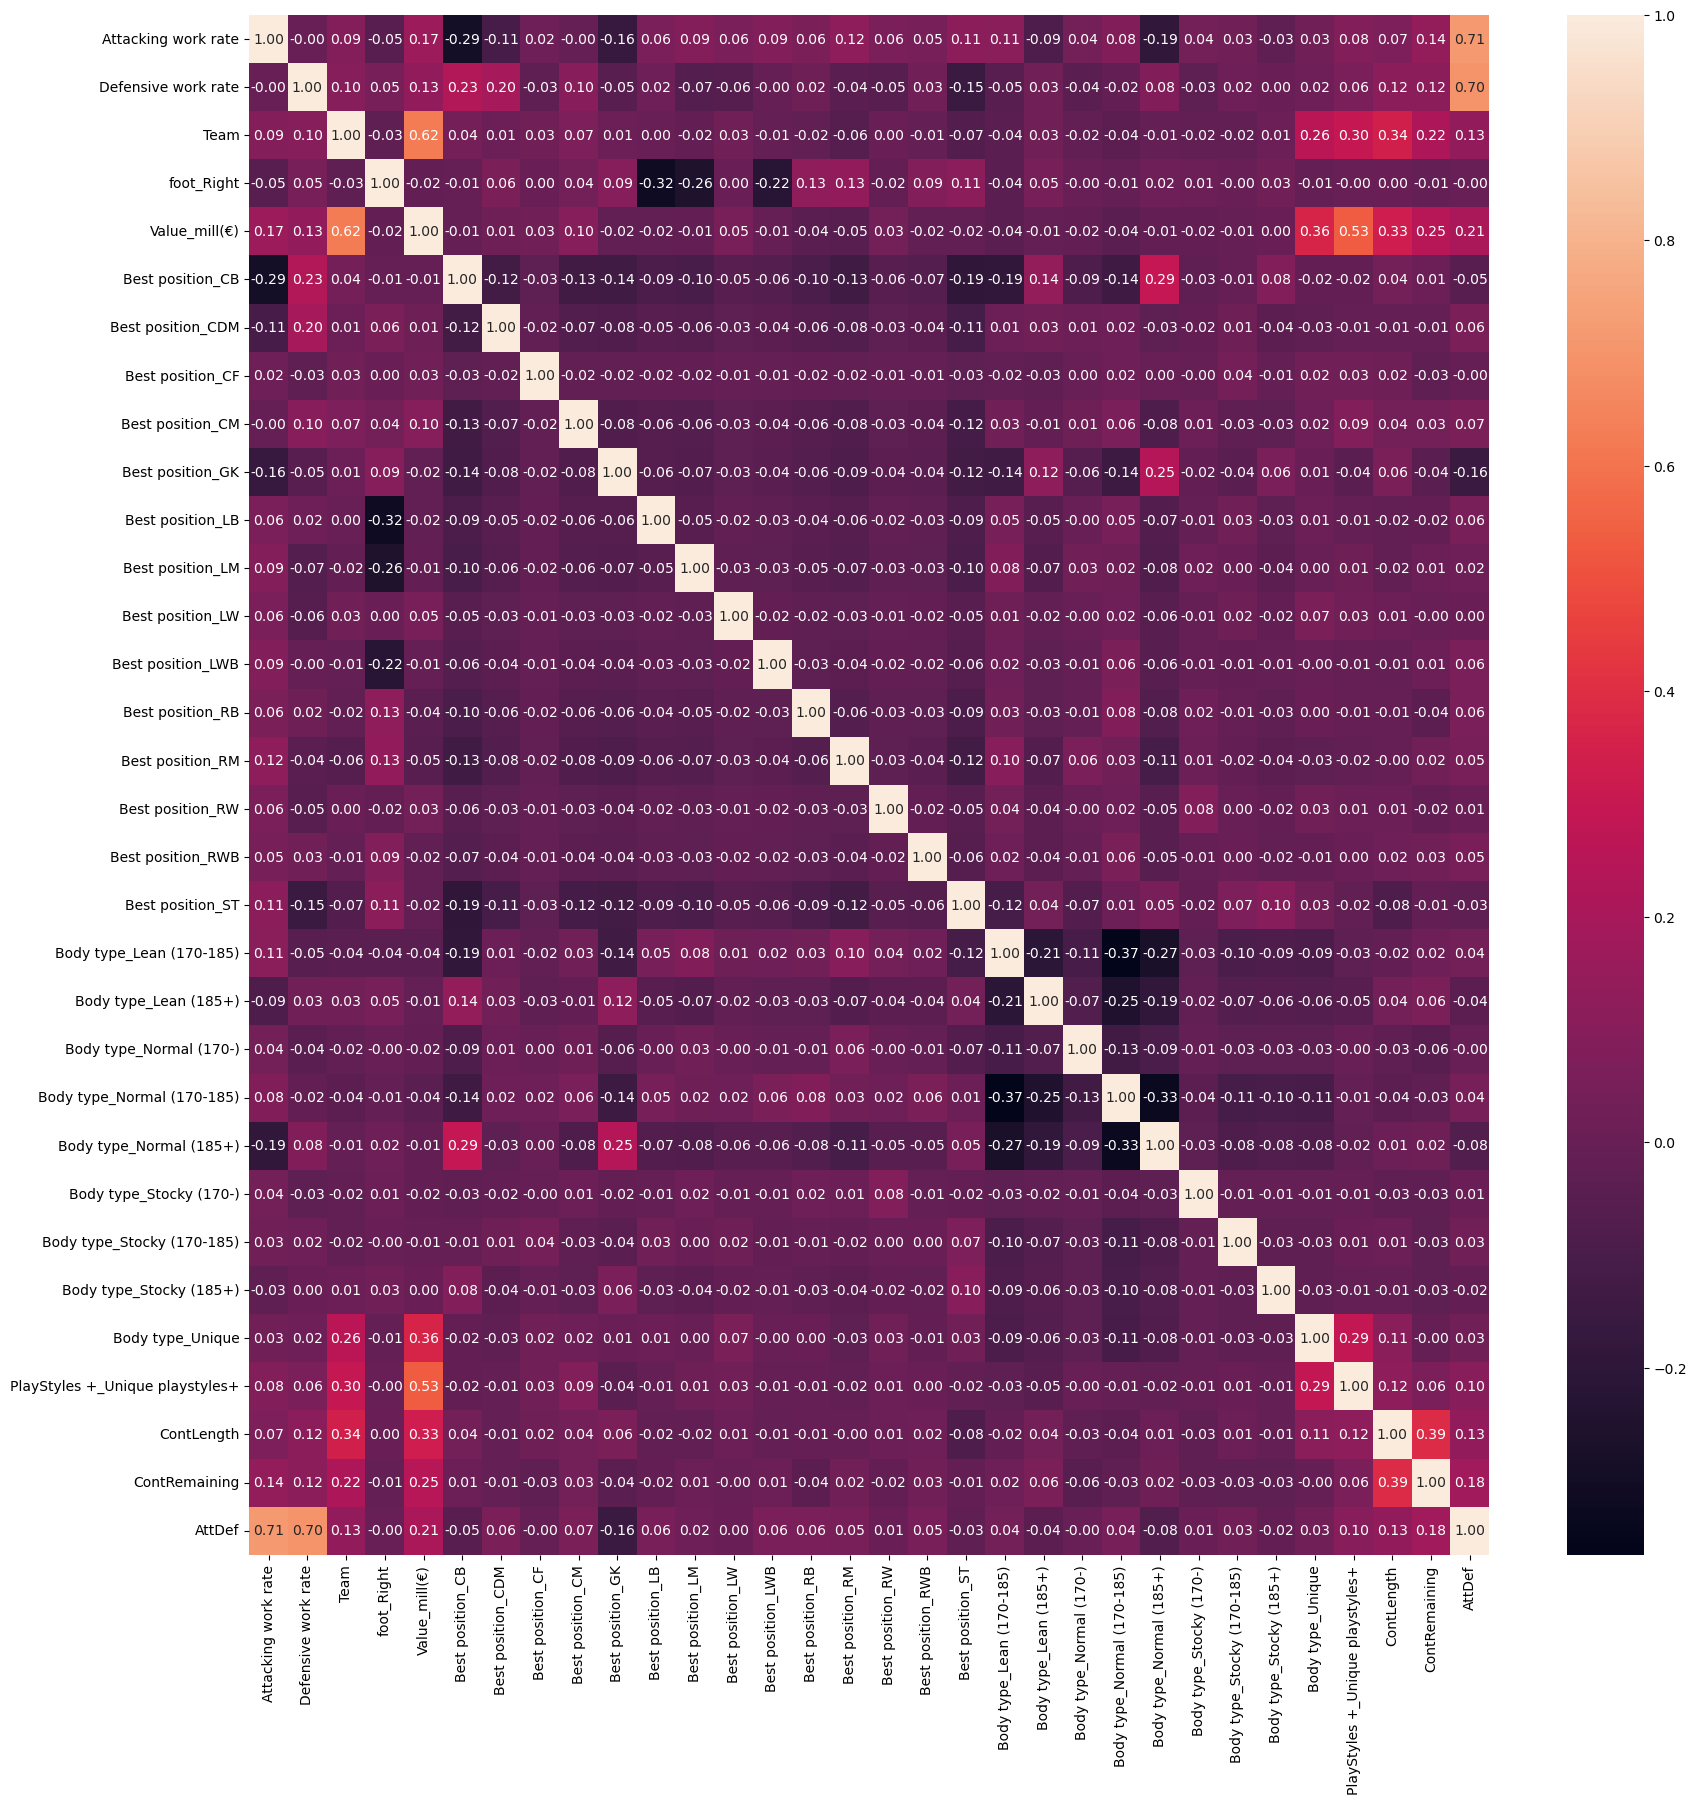

In [35]:
## Correlation

corr=data_new.corr()
print(corr['Value_mill(€)'])
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.2f')

In [36]:
## foot has very low variance
## and also it's not related closely to the market value

In [41]:
corr[corr['Value_mill(€)']>0.2]['Value_mill(€)']

Team                               0.622236
Value_mill(€)                      1.000000
Body type_Unique                   0.361240
PlayStyles +_Unique playstyles+    0.533279
ContLength                         0.332102
ContRemaining                      0.252466
AttDef                             0.210984
Name: Value_mill(€), dtype: float64

In [39]:
## Numeric_features
Numeric_features=[feature for feature in X_train.columns if (X_train[feature].dtype!='object') and feature!='ID']
Numeric_features

['Age',
 'Overall rating',
 'Potential',
 'Height_cm',
 'Weight_kg',
 'Growth',
 'Total attacking',
 'Crossing',
 'Finishing',
 'Heading accuracy',
 'Short passing',
 'Volleys',
 'Total skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long passing',
 'Ball control',
 'Total movement',
 'Acceleration',
 'Sprint speed',
 'Agility',
 'Reactions',
 'Balance',
 'Total power',
 'Shot power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long shots',
 'Total mentality',
 'Aggression',
 'Interceptions',
 'Att. Position',
 'Vision',
 'Penalties',
 'Composure',
 'Total defending',
 'Defensive awareness',
 'Standing tackle',
 'Sliding tackle',
 'Total goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total stats',
 'Base stats',
 'Weak foot',
 'Skill moves',
 'International reputation',
 'Pace / Diving',
 'Shooting / Handling',
 'Passing / Kicking',
 'Dribbling / Reflexes',
 'Defending / Pace',
 'Physical / Positioning',
 'Number of playstyles',
 'Value_mil

In [40]:
Var=[]
Var=np.var(X_train[Numeric_features])
Var

Age                         22.517058
Overall rating              61.722658
Potential                   37.905605
Height_cm                   48.621120
Weight_kg                   50.607588
                             ...     
Physical / Positioning     106.905639
Number of playstyles         3.327451
Value_mill(€)              182.257905
Wage_thous(€)             1003.711637
ReleaseClause_mill(€)      675.224123
Length: 62, dtype: float64

In [42]:
Var[Var<100],len(Var[Var<100])


(Age                         22.517058
 Overall rating              61.722658
 Potential                   37.905605
 Height_cm                   48.621120
 Weight_kg                   50.607588
 Growth                      34.545271
 Reactions                   99.347989
 Weak foot                    0.505911
 Skill moves                  0.712336
 International reputation     0.421915
 Dribbling / Reflexes        95.354194
 Number of playstyles         3.327451
 dtype: float64,
 12)

                             Age  Overall rating  Potential  Height_cm  \
Age                     1.000000        0.551048  -0.113869   0.068445   
Overall rating          0.551048        1.000000   0.672765   0.058288   
Potential              -0.113869        0.672765   1.000000   0.042008   
Height_cm               0.068445        0.058288   0.042008   1.000000   
Weight_kg               0.237141        0.150943   0.004694   0.762628   
...                          ...             ...        ...        ...   
Physical / Positioning  0.442654        0.606865   0.290967   0.475435   
Number of playstyles    0.446894        0.628114   0.361026  -0.077731   
Value_mill(€)           0.160761        0.649545   0.578332   0.035001   
Wage_thous(€)           0.329271        0.667892   0.498618   0.058165   
ReleaseClause_mill(€)   0.141670        0.639365   0.582154   0.035093   

                        Weight_kg    Growth  Total attacking  Crossing  \
Age                      0.237141 -0.

<Axes: >

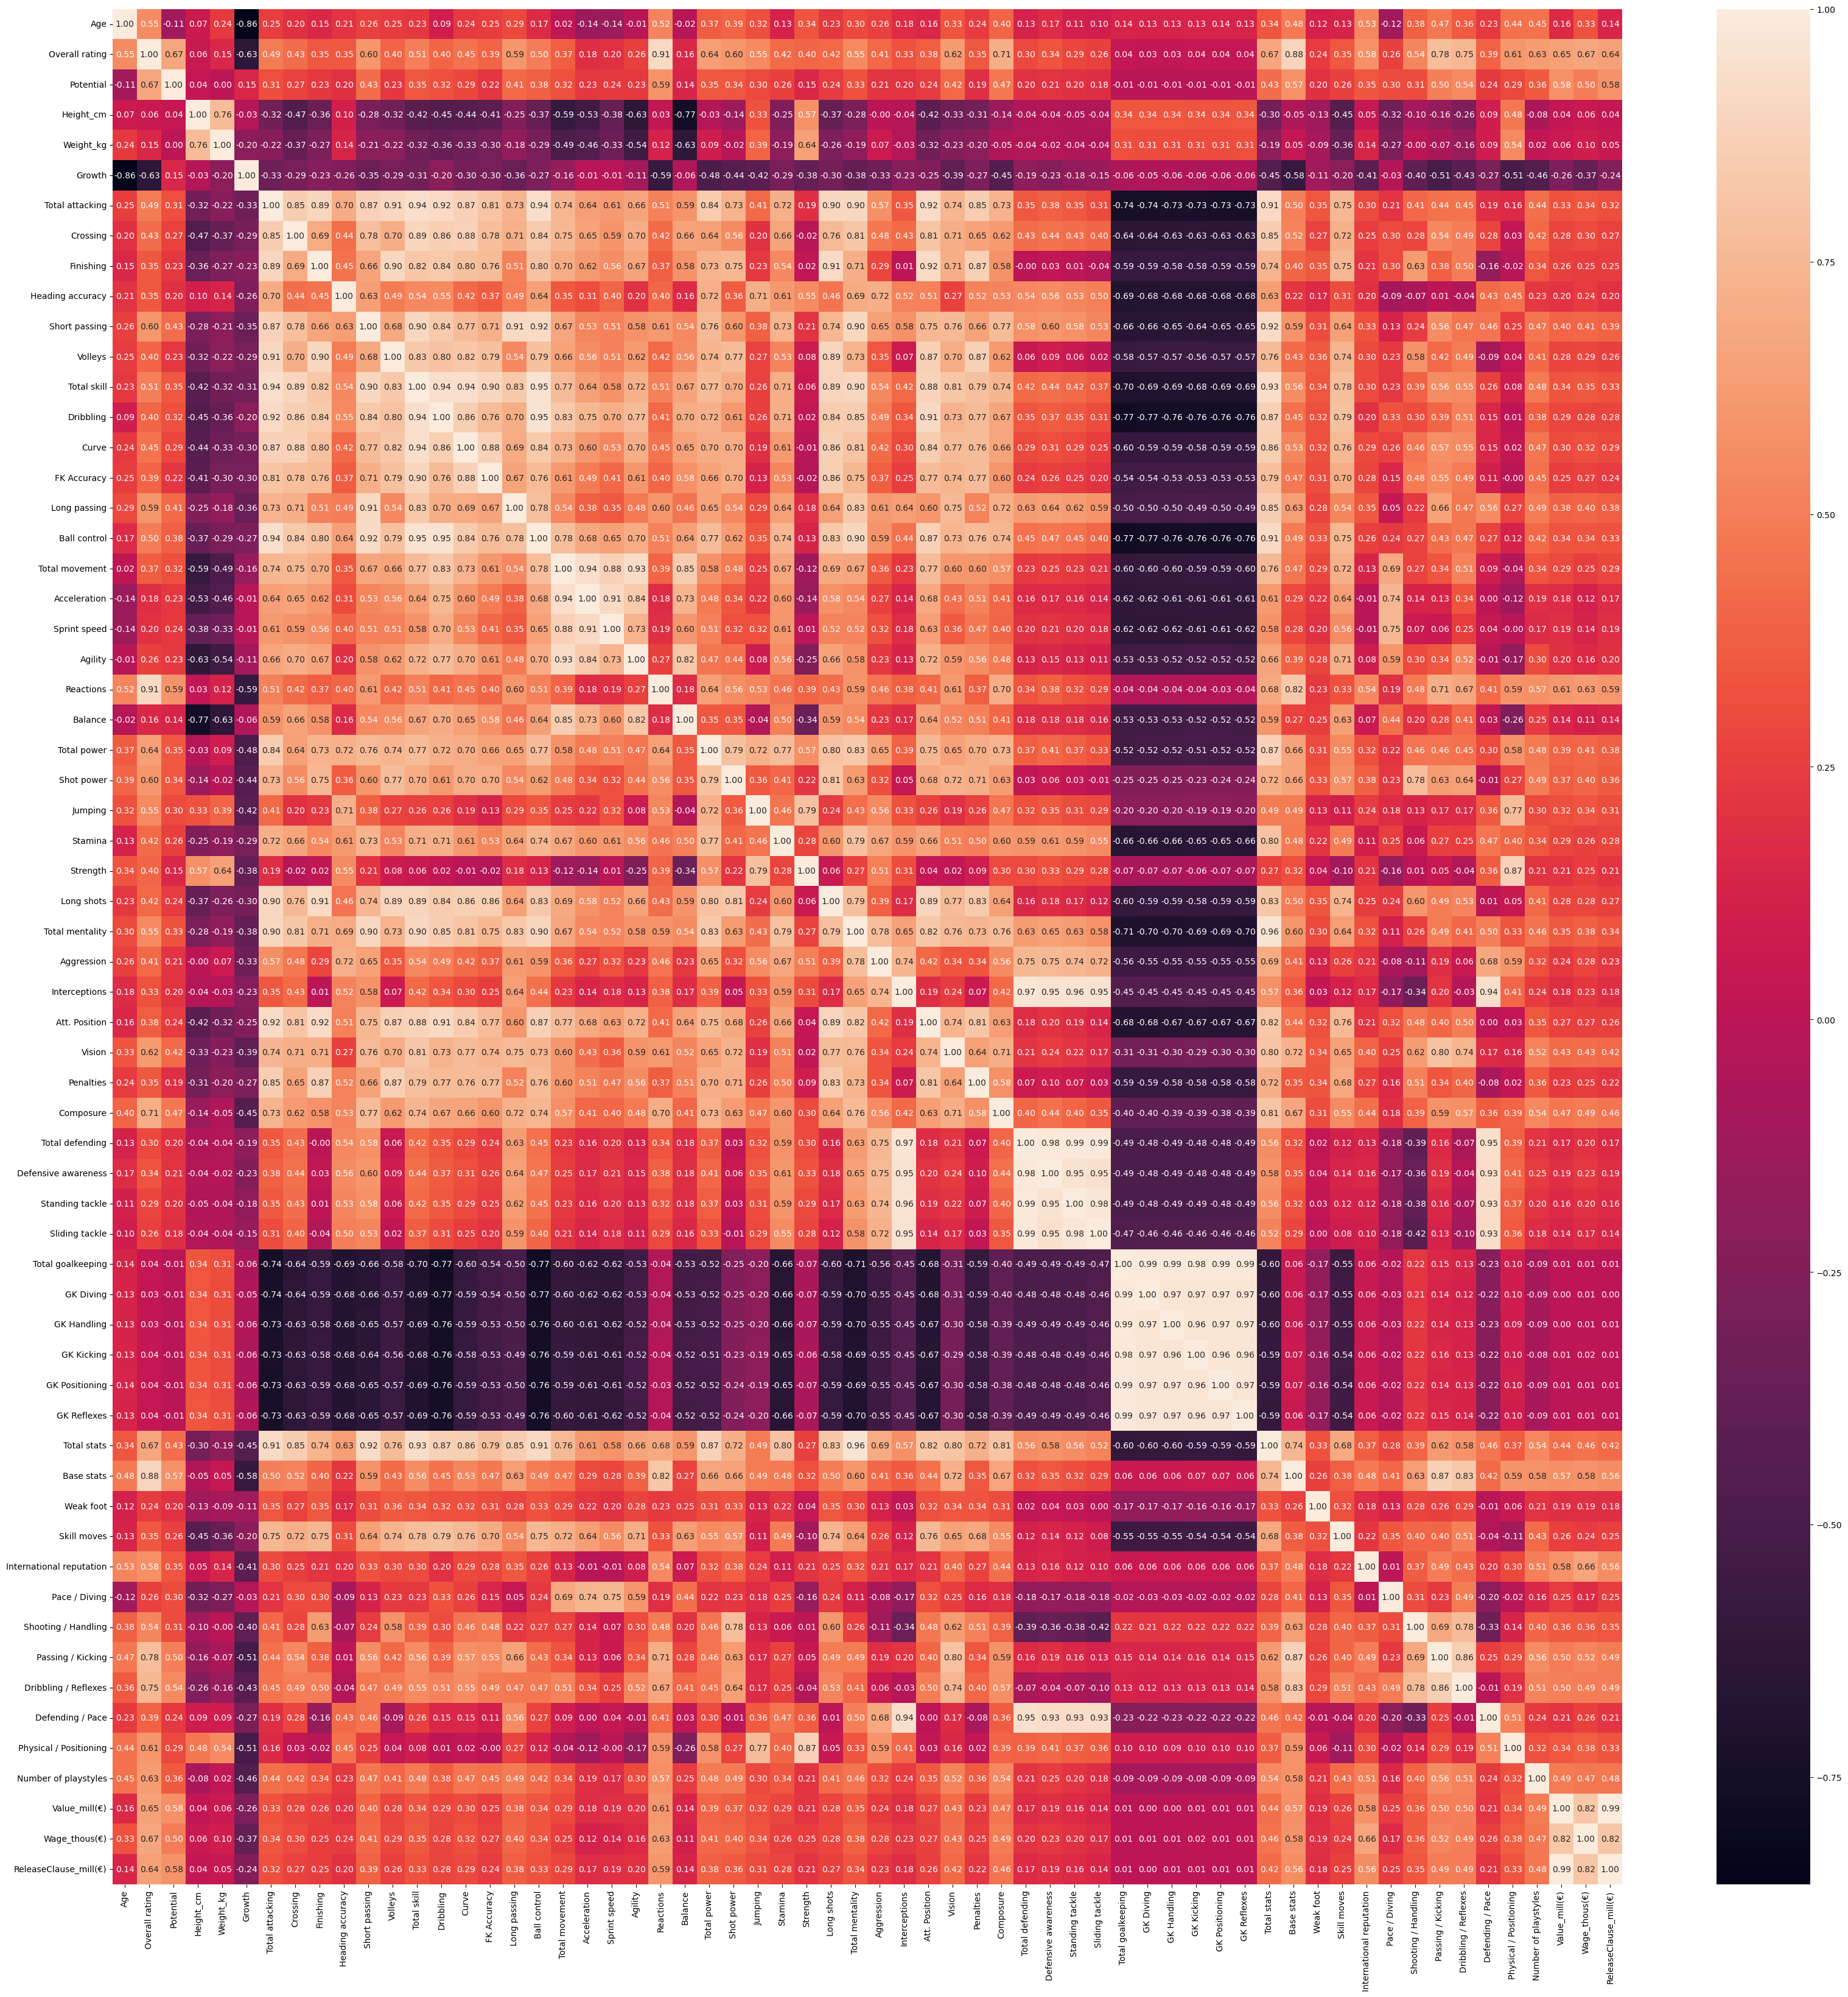

In [43]:
## Correlation of numeric features in the X_train dataset
corr=X_train[Numeric_features].corr()
print(corr)
plt.figure(figsize=(40,40))
sns.heatmap(corr,annot=True,fmt='.2f')

In [44]:
for feature in Numeric_features:
    if ("Total" in feature):
        print(feature)

Total attacking
Total skill
Total movement
Total power
Total mentality
Total defending
Total goalkeeping
Total stats


In [45]:
## Removing all total stats(att,def,mov,etc.)

Numeric_features_new=[feature for feature in Numeric_features if feature not in ['Total attacking',
'Total skill',
'Total movement',
'Total power',
'Total mentality',
'Total defending',
'Total goalkeeping',
'Total stats']]

In [46]:
Numeric_features_new

['Age',
 'Overall rating',
 'Potential',
 'Height_cm',
 'Weight_kg',
 'Growth',
 'Crossing',
 'Finishing',
 'Heading accuracy',
 'Short passing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long passing',
 'Ball control',
 'Acceleration',
 'Sprint speed',
 'Agility',
 'Reactions',
 'Balance',
 'Shot power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long shots',
 'Aggression',
 'Interceptions',
 'Att. Position',
 'Vision',
 'Penalties',
 'Composure',
 'Defensive awareness',
 'Standing tackle',
 'Sliding tackle',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Base stats',
 'Weak foot',
 'Skill moves',
 'International reputation',
 'Pace / Diving',
 'Shooting / Handling',
 'Passing / Kicking',
 'Dribbling / Reflexes',
 'Defending / Pace',
 'Physical / Positioning',
 'Number of playstyles',
 'Value_mill(€)',
 'Wage_thous(€)',
 'ReleaseClause_mill(€)']

In [47]:
Var=[]
Var=np.var(X_train[Numeric_features_new])
Var

Age                           22.517058
Overall rating                61.722658
Potential                     37.905605
Height_cm                     48.621120
Weight_kg                     50.607588
Growth                        34.545271
Crossing                     323.233356
Finishing                    402.958188
Heading accuracy             293.906361
Short passing                190.516352
Volleys                      335.202565
Dribbling                    329.835393
Curve                        338.580121
FK Accuracy                  307.978115
Long passing                 215.443147
Ball control                 258.159308
Acceleration                 207.949990
Sprint speed                 201.536052
Agility                      204.580080
Reactions                     99.347989
Balance                      204.910226
Shot power                   181.556389
Jumping                      148.106617
Stamina                      232.226754
Strength                     165.738189


                               Age  Overall rating  Potential  Height_cm  \
Age                       1.000000        0.551048  -0.113869   0.068445   
Overall rating            0.551048        1.000000   0.672765   0.058288   
Potential                -0.113869        0.672765   1.000000   0.042008   
Height_cm                 0.068445        0.058288   0.042008   1.000000   
Weight_kg                 0.237141        0.150943   0.004694   0.762628   
Growth                   -0.855855       -0.631955   0.148235  -0.033908   
Crossing                  0.200340        0.431130   0.273081  -0.466262   
Finishing                 0.154519        0.352424   0.229474  -0.362165   
Heading accuracy          0.205068        0.348330   0.195468   0.103763   
Short passing             0.256268        0.598129   0.431294  -0.281381   
Volleys                   0.245211        0.396228   0.229428  -0.320843   
Dribbling                 0.094529        0.402162   0.320489  -0.449928   
Curve       

<Axes: >

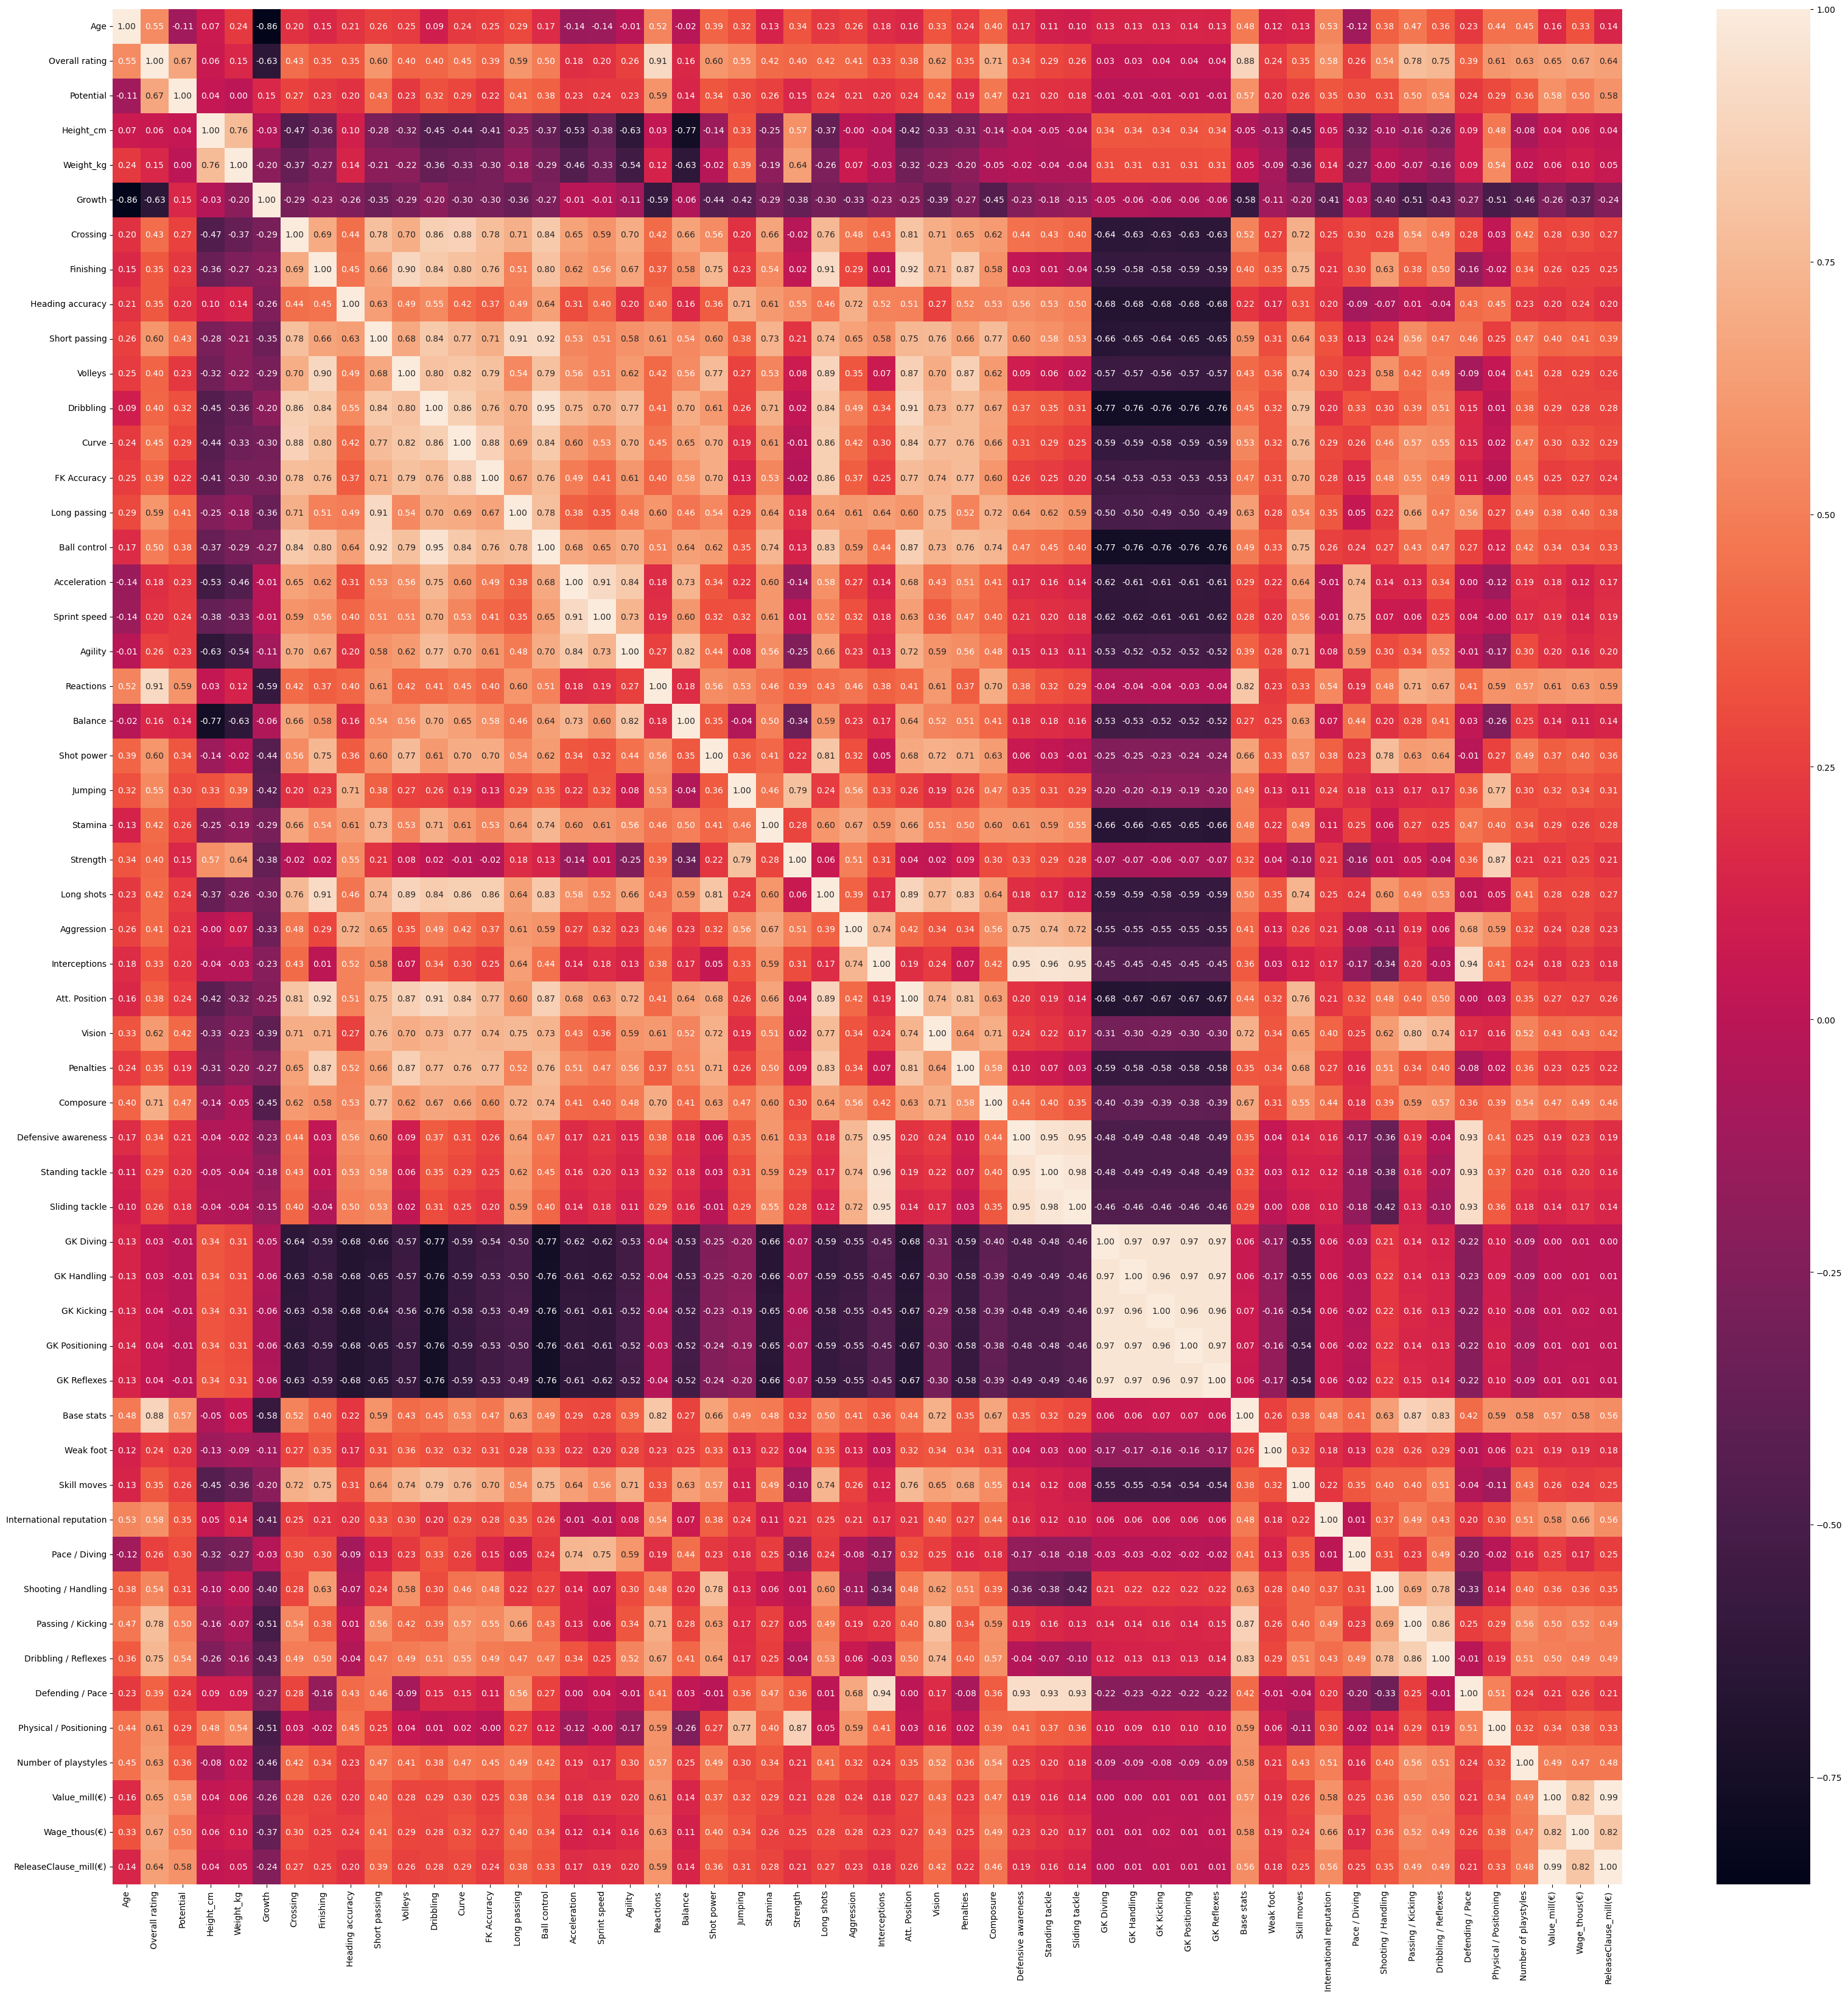

In [48]:
## Correlation of numeric features_new in the X_train dataset
corr=X_train[Numeric_features_new].corr()
print(corr)
plt.figure(figsize=(40,40))
sns.heatmap(corr,annot=True,fmt='.2f')

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
X=X_train.copy()
X=X[Numeric_features_new]
X.drop(columns='Value_mill(€)',inplace=True)
X

Age  Overall rating  Potential  Height_cm  Weight_kg  Growth  Crossing  \
2365   17              61         78        190         73      17        38   
1772   21              72         81        187         70       9        27   
2219   31              73         73        193         76       0        38   
910    22              75         81        191         88       6        29   
4215   24              65         68        174         72       3        63   
...   ...             ...        ...        ...        ...     ...       ...   
4931   21              67         75        179         70       8        61   
3264   30              79         79        188         77       0        11   
1653   19              69         83        184         70      14        57   
2607   23              72         78        182         75       6        59   
2732   22              69         76        185         83       7        48   

      Finishing  Heading accuracy  Short passing  Volleys  Dribbling  Curve  \
2365         63                62             59       43         59     29   
1772         22                72             68       25         59     29   
2219         40                81             61       30         45     37   
910          77                80             66       69         66     50   
4215         60                55             61       55         63     55   
...         ...               ...            ...      ...        ...    ...   
4931         57                51             64       54         68     58   
3264         11                12             33       19         19     15   
1653         62                45             72       55         74     51   
2607         55                64             71       47         67     43   
2732         69                72             60       62         62     53   

      FK Accuracy  Long passing  Ball control  Acceleration  Sprint speed  \
2365           36            51            60            63            62   
1772           16            66            65            69            75   
2219           33            60            55            33            35   
910            40            48            73            69            76   
4215           59            57            60            81            80   
...           ...           ...           ...           ...           ...   
4931           44            59            66            88            91   
3264           13            31            23            57            56   
1653           60            70            72            75            74   
2607           41            70            68            82            77   
2732           41            45            66            72            80   

      Agility  Reactions  Balance  Shot power  Jumping  Stamina  Strength  \
2365       69         52       58          69       68       56        66   
1772       58         69       60          41       80       68        75   
2219       32         68       36          62       78       44        83   
910        58         70       55          82       90       80        89   
4215       72         60       61          62       71       70        60   
...       ...        ...      ...         ...      ...      ...       ...   
4931       83         57       81          73       67       58        54   
3264       53         74       30          53       63       30        52   
1653       71         66       64          65       63       66        63   
2607       76         63       80          65       82       82        75   
2732       71         66       74          75       79       71        83   

      Long shots  Aggression  Interceptions  Att. Position  Vision  Penalties  \
2365          49          58             26             62      43         56   
1772          24          74             71             15      47         32   
221

In [51]:
X=sm.add_constant(X)
X

const  Age  Overall rating  Potential  Height_cm  Weight_kg  Growth  \
2365    1.0   17              61         78        190         73      17   
1772    1.0   21              72         81        187         70       9   
2219    1.0   31              73         73        193         76       0   
910     1.0   22              75         81        191         88       6   
4215    1.0   24              65         68        174         72       3   
...     ...  ...             ...        ...        ...        ...     ...   
4931    1.0   21              67         75        179         70       8   
3264    1.0   30              79         79        188         77       0   
1653    1.0   19              69         83        184         70      14   
2607    1.0   23              72         78        182         75       6   
2732    1.0   22              69         76        185         83       7   

      Crossing  Finishing  Heading accuracy  Short passing  Volleys  \
2365        38         63                62             59       43   
1772        27         22                72             68       25   
2219        38         40                81             61       30   
910         29         77                80             66       69   
4215        63         60                55             61       55   
...        ...        ...               ...            ...      ...   
4931        61         57                51             64       54   
3264        11         11                12             33       19   
1653        57         62                45             72       55   
2607        59         55                64             71       47   
2732        48         69                72             60       62   

      Dribbling  Curve  FK Accuracy  Long passing  Ball control  Acceleration  \
2365         59     29           36            51            60            63   
1772         59     29           16            66            65            69   
2219         45     37           33            60            55            33   
910          66     50           40            48            73            69   
4215         63     55           59            57            60            81   
...         ...    ...          ...           ...           ...           ...   
4931         68     58           44            59            66            88   
3264         19     15           13            31            23            57   
1653         74     51           60            70            72            75   
2607         67     43           41            70            68            82   
2732         62     53           41            45            66            72   

      Sprint speed  Agility  Reactions  Balance  Shot power  Jumping  Stamina  \
2365            62       69         52       58          69       68       56   
1772            75       58         69       60          41       80       68   
2219            35       32         68       36          62       78       44   
910             76       58         70       55          82       90       80   
4215            80       72         60       61          62       71       70   
...            ...      ...        ...      ...         ...      ...      ...   
4931            91       83         57       81          73       67       58   
3264            56       53         74       30          53       63       30   
1653            74       71         66       64          65       63       66   
2607            77       76         63       80          65       82       82   
2732            80       71         66       74          75       79       71   

      Strength  Long shots  Aggression  Interceptions  Att. Position  Vision  \
2365        66          49          58             26             62      43   
1772        75          24          74             71             15      47   
2219        83          49          83    

In [52]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)

C:\C\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     Feature           VIF
0                      const  3.304106e+03
1                        Age  6.546827e+00
2             Overall rating           inf
3                  Potential           inf
4                  Height_cm  4.254563e+00
5                  Weight_kg  3.209481e+00
6                     Growth           inf
7                   Crossing  1.379133e+01
8                  Finishing  8.465634e+01
9           Heading accuracy  1.260312e+01
10             Short passing  2.331114e+01
11                   Volleys  9.471481e+00
12                 Dribbling  6.941585e+01
13                     Curve  9.926010e+00
14               FK Accuracy  6.919985e+00
15              Long passing  1.199212e+01
16              Ball control  3.780992e+01
17              Acceleration  5.239071e+01
18              Sprint speed  5.918564e+01
19                   Agility  7.720379e+00
20                 Reactions  7.081960e+00
21                   Balance  5.499581e+00
22         

In [53]:
## Avg. of potential and Overal Rating

## Avg. of 'Crossing',
#  'Finishing',             Total attacking
#  'Heading accuracy',
#  'Short passing',
#  'Volleys',


## Avg. of 'Dribbling',
#  'Curve',
#  'FK Accuracy',           Total Skill
#  'Long passing',
#  'Ball control',

## Avg. of 'Acceleration',
#  'Sprint speed',
#  'Agility',               Total movement
#  'Reactions',
#  'Balance',

## Avg. of 'Shot power',
#  'Jumping',
#  'Stamina',             Total Power
#  'Strength',
#  'Long shots',

## Avg. of 'Aggression',
#  'Interceptions',
#  'Att. Position',
#  'Vision',            Total Mentality
#  'Penalties',
#  'Composure',

## Avg. of 'Defensive awareness',
#  'Standing tackle',                Total Defending
#  'Sliding tackle',

## Avg. of 'GK Diving',
#  'GK Handling',
#  'GK Kicking',            Total GKp
#  'GK Positioning',
#  'GK Reflexes',

## Avg. of 'Pace / Diving',
#  'Shooting / Handling',
#  'Passing / Kicking',
#  'Dribbling / Reflexes',  Avg.Stats
#  'Defending / Pace',
#  'Physical / Positioning',

## Removing Base Stats

In [54]:
df=X.copy()
df['Avg_Rating'] = df[['Overall rating', 'Potential']].mean(axis=1)
df['Total_attacking'] = df[['Crossing', 'Finishing', 'Heading accuracy', 'Short passing', 'Volleys']].mean(axis=1)
df['Total_skill'] = df[['Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control']].mean(axis=1)
df['Total_movement'] = df[['Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance']].mean(axis=1)
df['Total_power'] = df[['Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots']].mean(axis=1)
df['Total_mentality'] = df[['Aggression', 'Interceptions', 'Att. Position', 'Vision', 'Penalties', 'Composure']].mean(axis=1)
df['Total_defending'] = df[['Defensive awareness', 'Standing tackle', 'Sliding tackle']].mean(axis=1)
df['Total_GKp'] = df[['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']].mean(axis=1)
df['Avg_stats'] = df[['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace', 'Physical / Positioning']].mean(axis=1)


original_features = [
    'Overall rating', 'Potential', 'Crossing', 'Finishing', 'Heading accuracy',
    'Short passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 
    'Long passing', 'Ball control', 'Acceleration', 'Sprint speed', 'Agility',
    'Reactions', 'Balance', 'Shot power', 'Jumping', 'Stamina', 'Strength', 
    'Long shots', 'Aggression', 'Interceptions', 'Att. Position', 'Vision', 
    'Penalties', 'Composure', 'Defensive awareness', 'Standing tackle', 
    'Sliding tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 
    'GK Positioning', 'GK Reflexes', 'Pace / Diving', 'Shooting / Handling', 
    'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace', 
    'Physical / Positioning', 'Base stats'
]

df = df.drop(columns=original_features)

In [55]:
df

const  Age  Height_cm  Weight_kg  Growth  Weak foot  Skill moves  \
2365    1.0   17        190         73      17          2            2   
1772    1.0   21        187         70       9          3            2   
2219    1.0   31        193         76       0          3            2   
910     1.0   22        191         88       6          3            2   
4215    1.0   24        174         72       3          4            3   
...     ...  ...        ...        ...     ...        ...          ...   
4931    1.0   21        179         70       8          3            4   
3264    1.0   30        188         77       0          3            1   
1653    1.0   19        184         70      14          3            3   
2607    1.0   23        182         75       6          4            2   
2732    1.0   22        185         83       7          3            3   

      International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      ReleaseClause_mill(€)  Avg_Rating  Total_attacking  Total_skill  \
2365                    1.7        69.5             53.0         47.0   
1772                   10.8        76.5             42.8         47.0   
2219                    4.0        73.0             50.0         46.0   
910                    15.3        78.0             64.2         55.4   
4215                    2.2        66.5             58.8         58.8   
...                     ...         ...              ...          ...   
4931                    3.8        71.0             57.4         59.0   
3264                   19.6        79.0             17.2         20.2   
1653                    9.3        76.0             58.2         65.4   
2607                    6.0        75.0             59.2         57.8   
2732                    5.8        72.5             62.2         53.4   

      Total_movement  Total_power  Total_mentality  Total_defending  \
2365            60.8         61.6        50.333333        29.666667   
1772            66.2         57.6        51.500000        72.000000   
2219            40.8         63.2        59.666667        72.666667   
910             65.6         80.4        64.666667        32.333333   
4215            70.8         64.2        57.833333        51.666667   
...              ...          ...              ...              ...   
4931            80.0         60.8        52.166667        34.333333   
3264            54.0         43.0        31.000000        17.000000   
1653            70.0         64.0        64.666667        61.666667   
2607            75.6         72.2        63.000000        69.333333   
2732            72.6         74.0        58.666667        42.666667   

      Total_GKp  Avg_stats  
2365       10.6  54.000000  
1772       10.0  59.500000  
2219       11.2  54.333333  
910        12.0  64.833333  
4215        9.6  62.333333  
...         ...        ...  
4931        9.4  61.500000  
3264       77.8  74.333333  
1653        8.8  66.666667  
2607        9.0  69.500000  
2732        9.4  64.000000  

[4543 rows x 20 columns]

In [56]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Display the VIF data
print(vif_data)

                     Feature          VIF
0                      const  2397.069388
1                        Age     6.268007
2                  Height_cm     3.435554
3                  Weight_kg     2.895825
4                     Growth     5.634838
5                  Weak foot     1.188495
6                Skill moves     3.446549
7   International reputation     2.700802
8       Number of playstyles     2.035133
9              Wage_thous(€)     3.909616
10     ReleaseClause_mill(€)     4.041503
11                Avg_Rating     4.815842
12           Total_attacking    24.986548
13               Total_skill    17.545972
14            Total_movement     8.654171
15               Total_power    10.916353
16           Total_mentality    19.078868
17           Total_defending     7.724922
18                 Total_GKp    47.234406
19                 Avg_stats    36.050754


<Axes: >

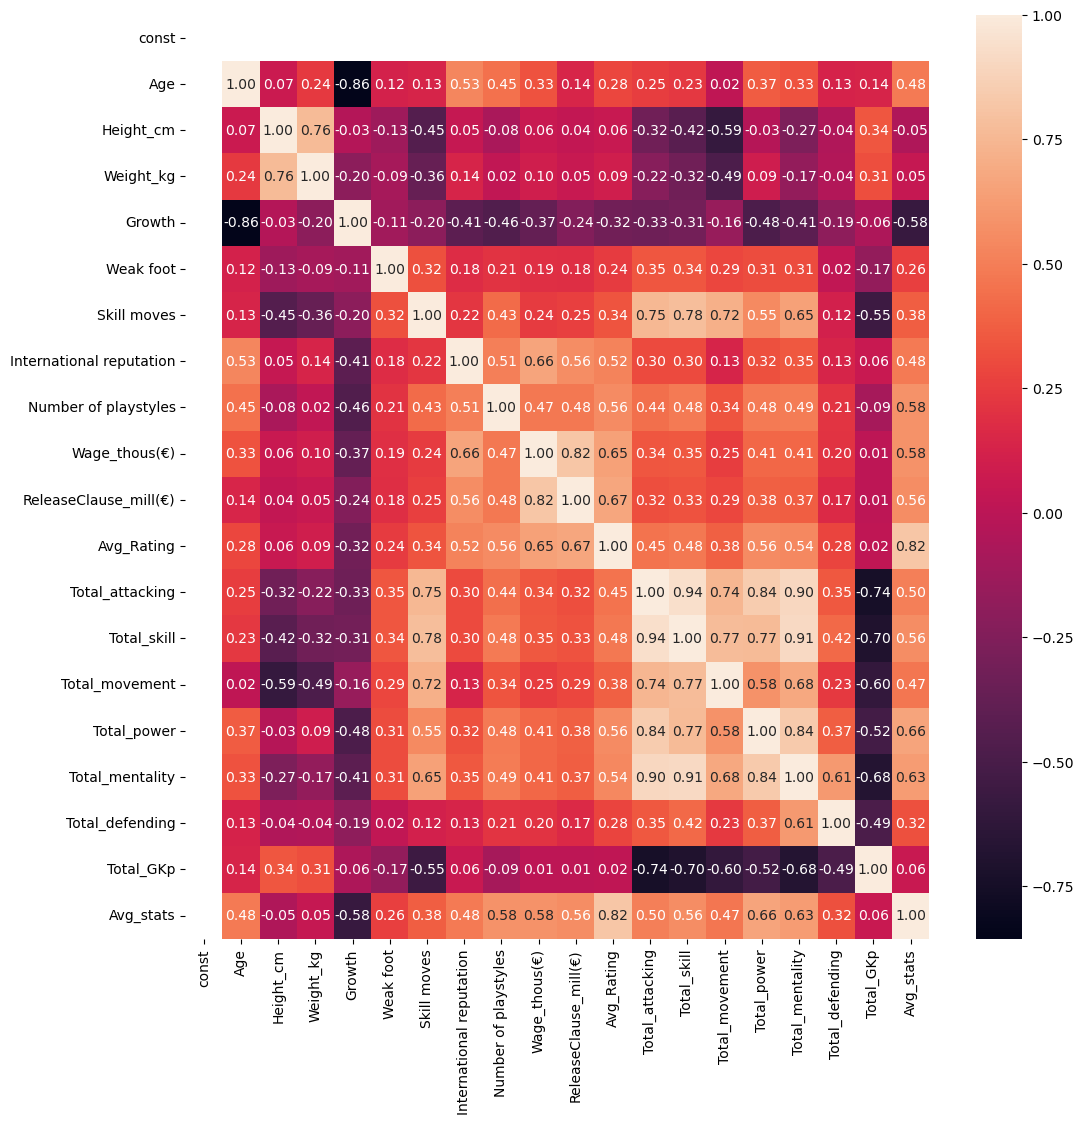

In [57]:
## Correlation of numeric features_new in the X_train dataset
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,fmt='.2f')

Attacking work rate                0.165313
Defensive work rate                0.132406
Team                               0.622236
foot_Right                        -0.016599
Value_mill(€)                      1.000000
Best position_CB                  -0.005976
Best position_CDM                  0.013695
Best position_CF                   0.026652
Best position_CM                   0.097325
Best position_GK                  -0.021855
Best position_LB                  -0.023067
Best position_LM                  -0.014786
Best position_LW                   0.052889
Best position_LWB                 -0.006624
Best position_RB                  -0.042221
Best position_RM                  -0.046248
Best position_RW                   0.034258
Best position_RWB                 -0.024019
Best position_ST                  -0.024071
Body type_Lean (170-185)          -0.041690
Body type_Lean (185+)             -0.011907
Body type_Normal (170-)           -0.015303
Body type_Normal (170-185)      

<Axes: >

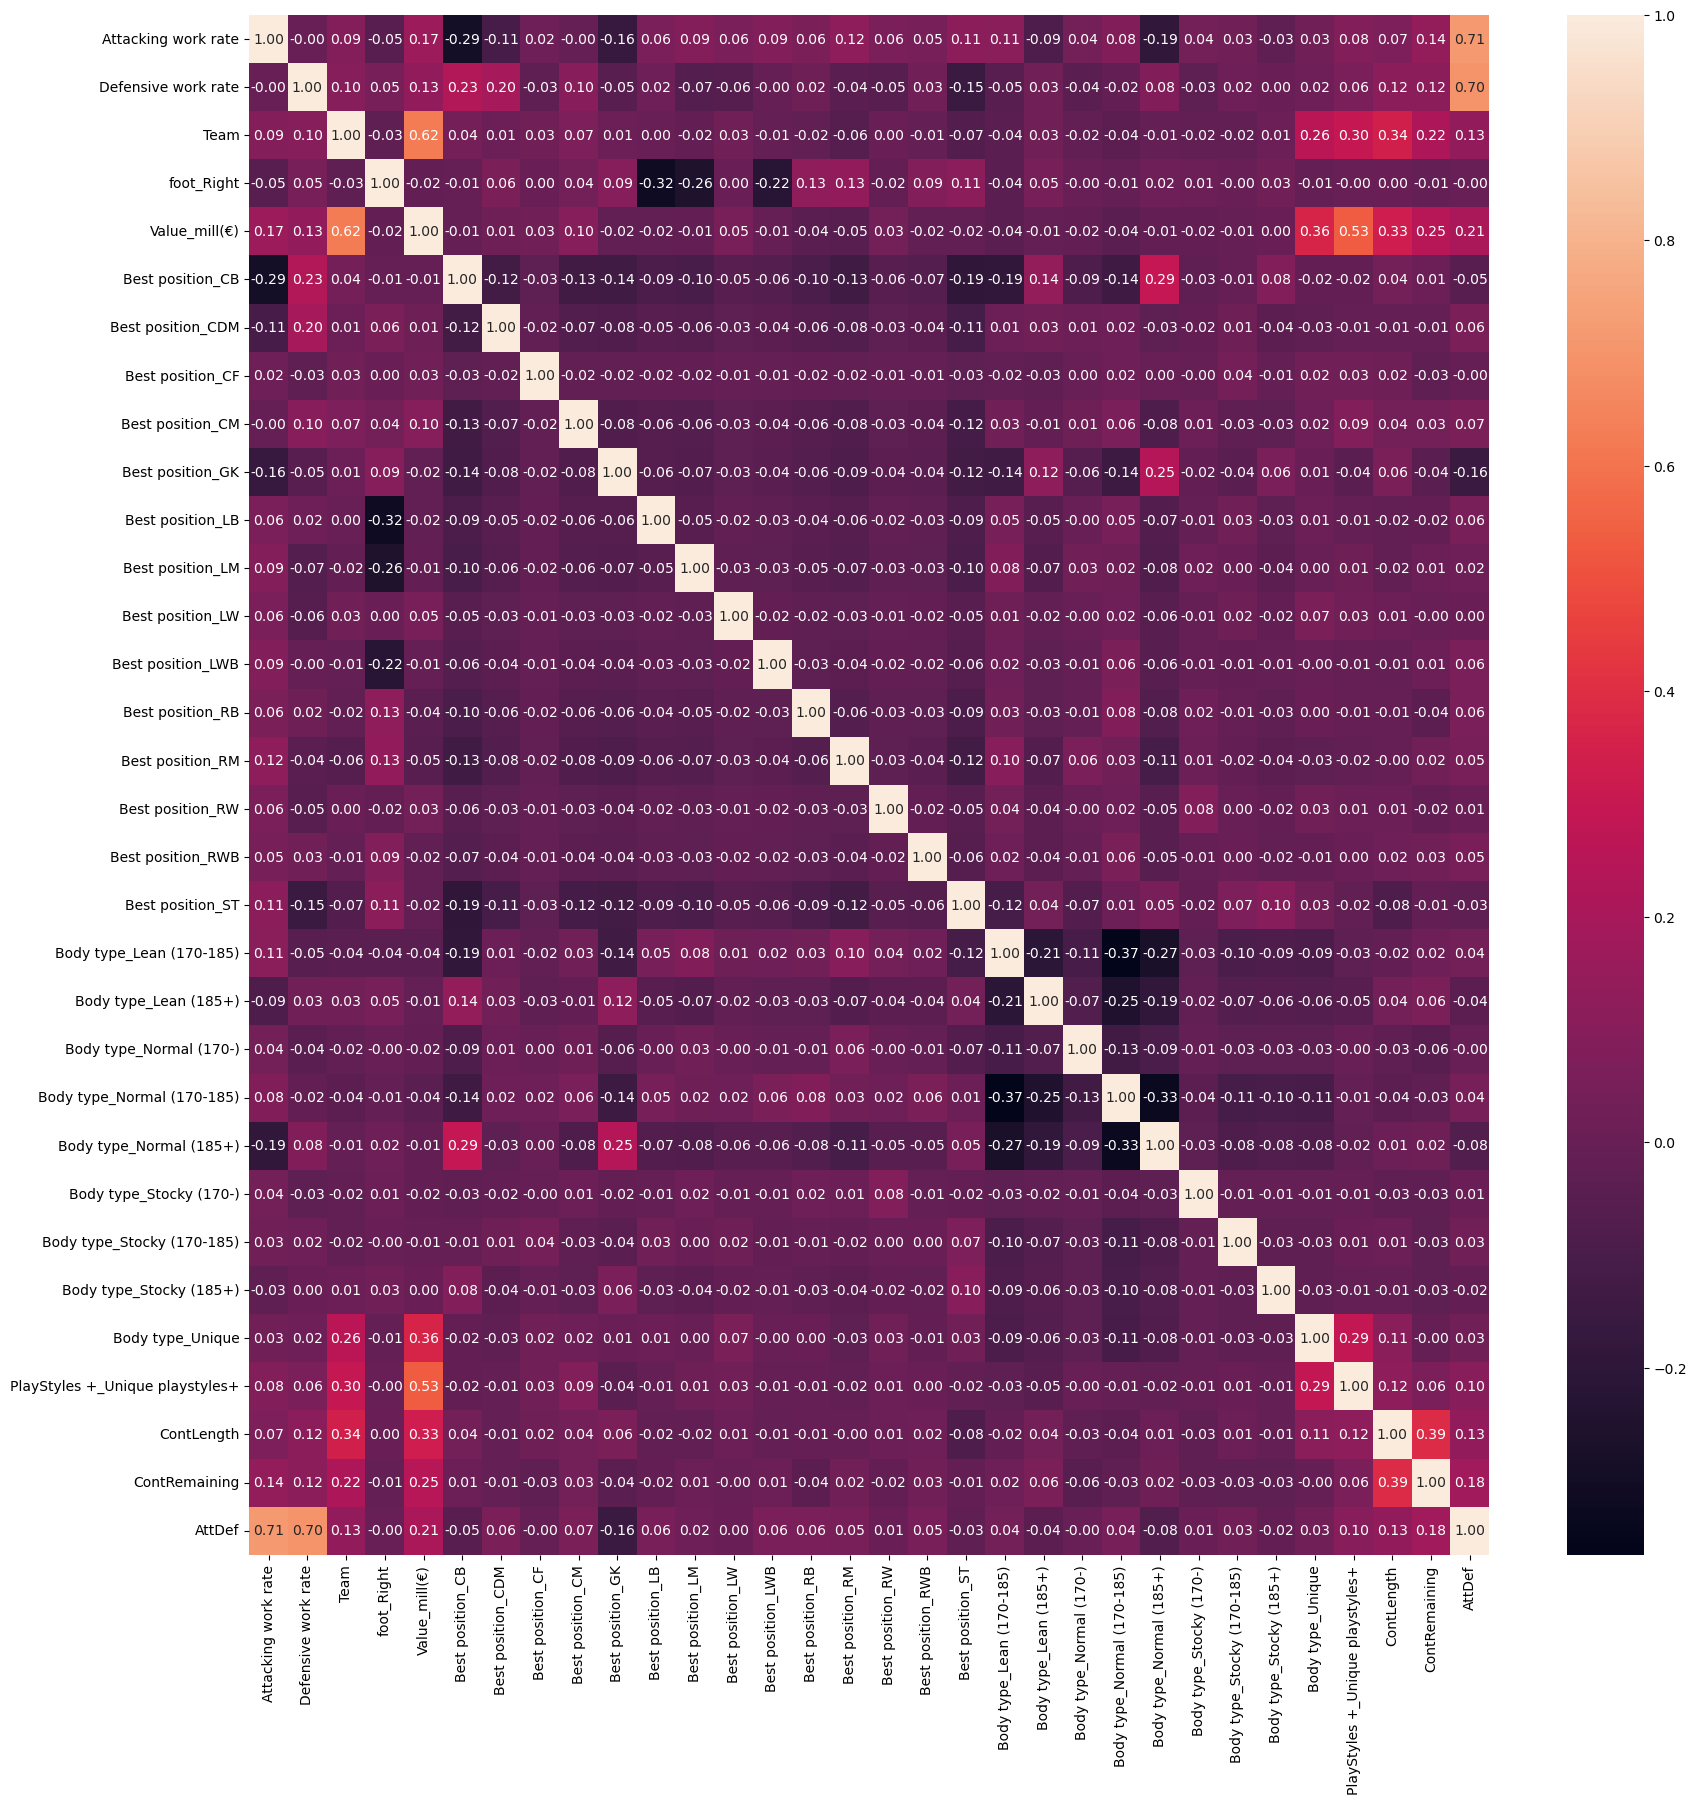

In [61]:
## Correlation for categorical values

corr=data_new.corr()
print(corr['Value_mill(€)'])
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.2f')

In [62]:
corr[corr['Value_mill(€)']>0.2]['Value_mill(€)']

Team                               0.622236
Value_mill(€)                      1.000000
Body type_Unique                   0.361240
PlayStyles +_Unique playstyles+    0.533279
ContLength                         0.332102
ContRemaining                      0.252466
AttDef                             0.210984
Name: Value_mill(€), dtype: float64

In [67]:
cat_features_new=['Team','Value_mill(€)',
'Body type_Unique',
'PlayStyles +_Unique playstyles+',
'ContLength',
'ContRemaining',
'AttDef']
cat_features_new

['Team',
 'Value_mill(€)',
 'Body type_Unique',
 'PlayStyles +_Unique playstyles+',
 'ContLength',
 'ContRemaining',
 'AttDef']

In [68]:
data_new[cat_features_new]

Team  Value_mill(€)  Body type_Unique  \
2365   1.412500          0.825                 0   
1772   4.237500          4.900                 0   
2219   3.100000          2.100                 0   
910    7.350000          9.000                 0   
4215   0.975000          0.975                 0   
...         ...            ...               ...   
4931   1.125000          2.300                 0   
3264  19.266667         11.500                 0   
1653   4.393750          3.300                 0   
2607   4.722222          3.500                 0   
2732   5.626786          2.900                 0   

      PlayStyles +_Unique playstyles+  ContLength  ContRemaining  AttDef  
2365                                0           4              4     1.5  
1772                                0           4              3     1.5  
2219                                0           4              3     1.0  
910                                 0           5              4     2.0  
4215                                0           2             -1     1.0  
...                               ...         ...            ...     ...  
4931                                0           3              2     1.0  
3264                                0           8              2     1.0  
1653                                0           5              5     1.0  
2607                                0           5              4     1.0  
2732                                0           6              5     1.5  

[4543 rows x 7 columns]

Team                               0.622236
Value_mill(€)                      1.000000
Body type_Unique                   0.361240
PlayStyles +_Unique playstyles+    0.533279
ContLength                         0.332102
ContRemaining                      0.252466
AttDef                             0.210984
Name: Value_mill(€), dtype: float64


<Axes: >

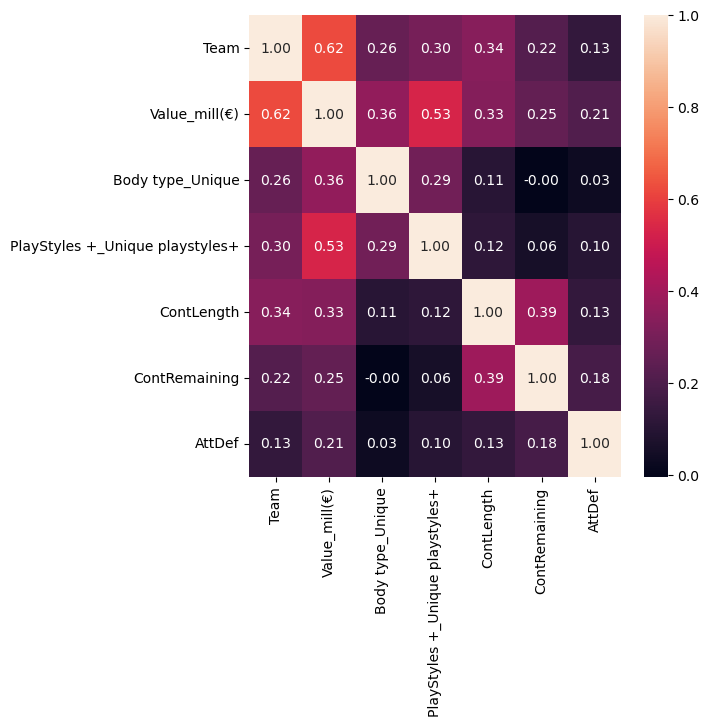

In [72]:
corr=data_new[cat_features_new].corr()
print(corr['Value_mill(€)'])
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,fmt='.2f')

In [74]:
data_cat=data_new.copy()
data_cat=data_cat[cat_features_new]
data_cat

Team  Value_mill(€)  Body type_Unique  \
2365   1.412500          0.825                 0   
1772   4.237500          4.900                 0   
2219   3.100000          2.100                 0   
910    7.350000          9.000                 0   
4215   0.975000          0.975                 0   
...         ...            ...               ...   
4931   1.125000          2.300                 0   
3264  19.266667         11.500                 0   
1653   4.393750          3.300                 0   
2607   4.722222          3.500                 0   
2732   5.626786          2.900                 0   

      PlayStyles +_Unique playstyles+  ContLength  ContRemaining  AttDef  
2365                                0           4              4     1.5  
1772                                0           4              3     1.5  
2219                                0           4              3     1.0  
910                                 0           5              4     2.0  
4215                                0           2             -1     1.0  
...                               ...         ...            ...     ...  
4931                                0           3              2     1.0  
3264                                0           8              2     1.0  
1653                                0           5              5     1.0  
2607                                0           5              4     1.0  
2732                                0           6              5     1.5  

[4543 rows x 7 columns]

In [75]:
## VIF for data_cat

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data_cat.columns
vif_data["VIF"] = [variance_inflation_factor(data_cat.values, i) for i in range(data_cat.shape[1])]

# Display the VIF data
print(vif_data)


                           Feature       VIF
0                             Team  2.865525
1                    Value_mill(€)  2.815944
2                 Body type_Unique  1.214817
3  PlayStyles +_Unique playstyles+  1.460897
4                       ContLength  6.032239
5                    ContRemaining  3.732035
6                           AttDef  4.868633


In [77]:
Data_num=pd.DataFrame(pd.concat([df,X_train['Value_mill(€)']],axis=1))
Data_num

const  Age  Height_cm  Weight_kg  Growth  Weak foot  Skill moves  \
2365    1.0   17        190         73      17          2            2   
1772    1.0   21        187         70       9          3            2   
2219    1.0   31        193         76       0          3            2   
910     1.0   22        191         88       6          3            2   
4215    1.0   24        174         72       3          4            3   
...     ...  ...        ...        ...     ...        ...          ...   
4931    1.0   21        179         70       8          3            4   
3264    1.0   30        188         77       0          3            1   
1653    1.0   19        184         70      14          3            3   
2607    1.0   23        182         75       6          4            2   
2732    1.0   22        185         83       7          3            3   

      International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      ReleaseClause_mill(€)  Avg_Rating  Total_attacking  Total_skill  \
2365                    1.7        69.5             53.0         47.0   
1772                   10.8        76.5             42.8         47.0   
2219                    4.0        73.0             50.0         46.0   
910                    15.3        78.0             64.2         55.4   
4215                    2.2        66.5             58.8         58.8   
...                     ...         ...              ...          ...   
4931                    3.8        71.0             57.4         59.0   
3264                   19.6        79.0             17.2         20.2   
1653                    9.3        76.0             58.2         65.4   
2607                    6.0        75.0             59.2         57.8   
2732                    5.8        72.5             62.2         53.4   

      Total_movement  Total_power  Total_mentality  Total_defending  \
2365            60.8         61.6        50.333333        29.666667   
1772            66.2         57.6        51.500000        72.000000   
2219            40.8         63.2        59.666667        72.666667   
910             65.6         80.4        64.666667        32.333333   
4215            70.8         64.2        57.833333        51.666667   
...              ...          ...              ...              ...   
4931            80.0         60.8        52.166667        34.333333   
3264            54.0         43.0        31.000000        17.000000   
1653            70.0         64.0        64.666667        61.666667   
2607            75.6         72.2        63.000000        69.333333   
2732            72.6         74.0        58.666667        42.666667   

      Total_GKp  Avg_stats  Value_mill(€)  
2365       10.6  54.000000          0.825  
1772       10.0  59.500000          4.900  
2219       11.2  54.333333          2.100  
910        12.0  64.833333          9.000  
4215        9.6  62.333333          0.975  
...         ...        ...            ...  
4931        9.4  61.500000          2.300  
3264       77.8  74.333333         11.500  
1653        8.8  66.666667          3.300  
2607        9.0  69.500000          3.500  
2732        9.4  64.000000          2.900  

[4543

In [78]:
## Correlation of numeric features_new in the X_train dataset
corr=Data_num.corr()
print(corr['Value_mill(€)'])
# plt.figure(figsize=(12,12))
# sns.heatmap(corr,annot=True,fmt='.2f')

const                            NaN
Age                         0.160761
Height_cm                   0.035001
Weight_kg                   0.060090
Growth                     -0.262427
Weak foot                   0.185594
Skill moves                 0.261575
International reputation    0.584031
Number of playstyles        0.492375
Wage_thous(€)               0.819389
ReleaseClause_mill(€)       0.994319
Avg_Rating                  0.675060
Total_attacking             0.327649
Total_skill                 0.337660
Total_movement              0.292172
Total_power                 0.393980
Total_mentality             0.381848
Total_defending             0.166723
Total_GKp                   0.005308
Avg_stats                   0.568589
Value_mill(€)               1.000000
Name: Value_mill(€), dtype: float64


In [79]:
## VIF for data_num

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = Data_num.columns
vif_data["VIF"] = [variance_inflation_factor(Data_num.values, i) for i in range(Data_num.shape[1])]

# Display the VIF data
print(vif_data)


                     Feature          VIF
0                      const  2397.250659
1                        Age     6.295511
2                  Height_cm     3.435556
3                  Weight_kg     2.897828
4                     Growth     5.672479
5                  Weak foot     1.188500
6                Skill moves     3.447165
7   International reputation     2.805992
8       Number of playstyles     2.045616
9              Wage_thous(€)     3.909820
10     ReleaseClause_mill(€)    95.436817
11                Avg_Rating     4.815866
12           Total_attacking    24.987443
13               Total_skill    17.561194
14            Total_movement     8.662731
15               Total_power    10.934205
16           Total_mentality    19.085350
17           Total_defending     7.726157
18                 Total_GKp    47.258860
19                 Avg_stats    36.074627
20             Value_mill(€)    97.587051


In [80]:
# dropping columns Release Clause
data_num=Data_num.copy()
data_num=data_num.drop(columns=['ReleaseClause_mill(€)'])
data_num

const  Age  Height_cm  Weight_kg  Growth  Weak foot  Skill moves  \
2365    1.0   17        190         73      17          2            2   
1772    1.0   21        187         70       9          3            2   
2219    1.0   31        193         76       0          3            2   
910     1.0   22        191         88       6          3            2   
4215    1.0   24        174         72       3          4            3   
...     ...  ...        ...        ...     ...        ...          ...   
4931    1.0   21        179         70       8          3            4   
3264    1.0   30        188         77       0          3            1   
1653    1.0   19        184         70      14          3            3   
2607    1.0   23        182         75       6          4            2   
2732    1.0   22        185         83       7          3            3   

      International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      Avg_Rating  Total_attacking  Total_skill  Total_movement  Total_power  \
2365        69.5             53.0         47.0            60.8         61.6   
1772        76.5             42.8         47.0            66.2         57.6   
2219        73.0             50.0         46.0            40.8         63.2   
910         78.0             64.2         55.4            65.6         80.4   
4215        66.5             58.8         58.8            70.8         64.2   
...          ...              ...          ...             ...          ...   
4931        71.0             57.4         59.0            80.0         60.8   
3264        79.0             17.2         20.2            54.0         43.0   
1653        76.0             58.2         65.4            70.0         64.0   
2607        75.0             59.2         57.8            75.6         72.2   
2732        72.5             62.2         53.4            72.6         74.0   

      Total_mentality  Total_defending  Total_GKp  Avg_stats  Value_mill(€)  
2365        50.333333        29.666667       10.6  54.000000          0.825  
1772        51.500000        72.000000       10.0  59.500000          4.900  
2219        59.666667        72.666667       11.2  54.333333          2.100  
910         64.666667        32.333333       12.0  64.833333          9.000  
4215        57.833333        51.666667        9.6  62.333333          0.975  
...               ...              ...        ...        ...            ...  
4931        52.166667        34.333333        9.4  61.500000          2.300  
3264        31.000000        17.000000       77.8  74.333333         11.500  
1653        64.666667        61.666667        8.8  66.666667          3.300  
2607        63.000000        69.333333        9.0  69.500000          3.500  
2732        58.666667        42.666667        9.4  64.000000          2.900  

[4543 rows x 20 columns]

In [81]:
## VIF for data_num

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data_num.columns
vif_data["VIF"] = [variance_inflation_factor(data_num.values, i) for i in range(data_num.shape[1])]

# Display the VIF data
print(vif_data)


                     Feature          VIF
0                      const  2396.980556
1                        Age     6.295364
2                  Height_cm     3.435501
3                  Weight_kg     2.895663
4                     Growth     5.662744
5                  Weak foot     1.188499
6                Skill moves     3.446461
7   International reputation     2.741772
8       Number of playstyles     2.042468
9              Wage_thous(€)     3.840907
10                Avg_Rating     4.808114
11           Total_attacking    24.984434
12               Total_skill    17.533277
13            Total_movement     8.654465
14               Total_power    10.918640
15           Total_mentality    19.073229
16           Total_defending     7.722488
17                 Total_GKp    47.228973
18                 Avg_stats    36.049094
19             Value_mill(€)     4.132560


In [82]:
corr=data_num.corr()
print(corr['Value_mill(€)'])

const                            NaN
Age                         0.160761
Height_cm                   0.035001
Weight_kg                   0.060090
Growth                     -0.262427
Weak foot                   0.185594
Skill moves                 0.261575
International reputation    0.584031
Number of playstyles        0.492375
Wage_thous(€)               0.819389
Avg_Rating                  0.675060
Total_attacking             0.327649
Total_skill                 0.337660
Total_movement              0.292172
Total_power                 0.393980
Total_mentality             0.381848
Total_defending             0.166723
Total_GKp                   0.005308
Avg_stats                   0.568589
Value_mill(€)               1.000000
Name: Value_mill(€), dtype: float64


In [83]:
## total has very high VIF and is not very closely related to value, so I'm dropping it

data_num.drop(columns='Total_GKp',inplace=True)

In [84]:
## VIF for data_num

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data_num.columns
vif_data["VIF"] = [variance_inflation_factor(data_num.values, i) for i in range(data_num.shape[1])]

# Display the VIF data
print(vif_data)


                     Feature          VIF
0                      const  2317.151617
1                        Age     6.078943
2                  Height_cm     3.385218
3                  Weight_kg     2.888773
4                     Growth     5.649415
5                  Weak foot     1.187529
6                Skill moves     3.406668
7   International reputation     2.739145
8       Number of playstyles     2.032969
9              Wage_thous(€)     3.839299
10                Avg_Rating     4.807532
11           Total_attacking    20.571847
12               Total_skill    15.934180
13            Total_movement     4.450517
14               Total_power     8.101928
15           Total_mentality    18.002673
16           Total_defending     2.952421
17                 Avg_stats     6.757371
18             Value_mill(€)     4.132222


In [90]:
# Now I am removing the total_att,total_skill,total_ment

data_num['TotalAttSkiMent']=(data_num['Total_attacking']+data_num['Total_skill']+data_num['Total_mentality'])/3
data_num.drop(columns=['Total_attacking','Total_skill','Total_mentality'],inplace=True)
data_num

const  Age  Height_cm  Weight_kg  Growth  Weak foot  Skill moves  \
2365    1.0   17        190         73      17          2            2   
1772    1.0   21        187         70       9          3            2   
2219    1.0   31        193         76       0          3            2   
910     1.0   22        191         88       6          3            2   
4215    1.0   24        174         72       3          4            3   
...     ...  ...        ...        ...     ...        ...          ...   
4931    1.0   21        179         70       8          3            4   
3264    1.0   30        188         77       0          3            1   
1653    1.0   19        184         70      14          3            3   
2607    1.0   23        182         75       6          4            2   
2732    1.0   22        185         83       7          3            3   

      International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      Avg_Rating  Total_movement  Total_power  Total_defending  Avg_stats  \
2365        69.5            60.8         61.6        29.666667  54.000000   
1772        76.5            66.2         57.6        72.000000  59.500000   
2219        73.0            40.8         63.2        72.666667  54.333333   
910         78.0            65.6         80.4        32.333333  64.833333   
4215        66.5            70.8         64.2        51.666667  62.333333   
...          ...             ...          ...              ...        ...   
4931        71.0            80.0         60.8        34.333333  61.500000   
3264        79.0            54.0         43.0        17.000000  74.333333   
1653        76.0            70.0         64.0        61.666667  66.666667   
2607        75.0            75.6         72.2        69.333333  69.500000   
2732        72.5            72.6         74.0        42.666667  64.000000   

      Value_mill(€)  TotalAttSkiMent  
2365          0.825        50.111111  
1772          4.900        47.100000  
2219          2.100        51.888889  
910           9.000        61.422222  
4215          0.975        58.477778  
...             ...              ...  
4931          2.300        56.188889  
3264         11.500        22.800000  
1653          3.300        62.755556  
2607          3.500        60.000000  
2732          2.900        58.088889  

[4543 rows x 17 columns]

In [91]:
## VIF for data_num

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data_num.columns
vif_data["VIF"] = [variance_inflation_factor(data_num.values, i) for i in range(data_num.shape[1])]

# Display the VIF data
print(vif_data)


                     Feature          VIF
0                      const  2282.412031
1                        Age     5.992654
2                  Height_cm     3.332623
3                  Weight_kg     2.888569
4                     Growth     5.600728
5                  Weak foot     1.187484
6                Skill moves     3.338134
7   International reputation     2.726688
8       Number of playstyles     1.987914
9              Wage_thous(€)     3.838791
10                Avg_Rating     4.738954
11            Total_movement     4.383263
12               Total_power     6.754613
13           Total_defending     1.647431
14                 Avg_stats     5.544771
15             Value_mill(€)     4.122027
16           TotalAttSkiMent    10.297436


In [92]:
corr=data_num.corr()
print(corr['Value_mill(€)'])

const                            NaN
Age                         0.160761
Height_cm                   0.035001
Weight_kg                   0.060090
Growth                     -0.262427
Weak foot                   0.185594
Skill moves                 0.261575
International reputation    0.584031
Number of playstyles        0.492375
Wage_thous(€)               0.819389
Avg_Rating                  0.675060
Total_movement              0.292172
Total_power                 0.393980
Total_defending             0.166723
Avg_stats                   0.568589
Value_mill(€)               1.000000
TotalAttSkiMent             0.357193
Name: Value_mill(€), dtype: float64


In [93]:
## Removing Height and weight

data_num.drop(columns=['Height_cm','Weight_kg'],inplace=True)
data_num

const  Age  Growth  Weak foot  Skill moves  International reputation  \
2365    1.0   17      17          2            2                         1   
1772    1.0   21       9          3            2                         1   
2219    1.0   31       0          3            2                         1   
910     1.0   22       6          3            2                         1   
4215    1.0   24       3          4            3                         1   
...     ...  ...     ...        ...          ...                       ...   
4931    1.0   21       8          3            4                         1   
3264    1.0   30       0          3            1                         2   
1653    1.0   19      14          3            3                         1   
2607    1.0   23       6          4            2                         1   
2732    1.0   22       7          3            3                         1   

      Number of playstyles  Wage_thous(€)  Avg_Rating  Total_movement  \
2365                     0            0.7        69.5            60.8   
1772                     0           21.0        76.5            66.2   
2219                     2           25.0        73.0            40.8   
910                      0           21.0        78.0            65.6   
4215                     0            0.5        66.5            70.8   
...                    ...            ...         ...             ...   
4931                     2            3.0        71.0            80.0   
3264                     1           73.0        79.0            54.0   
1653                     0            0.5        76.0            70.0   
2607                     3            9.0        75.0            75.6   
2732                     0           22.0        72.5            72.6   

      Total_power  Total_defending  Avg_stats  Value_mill(€)  TotalAttSkiMent  
2365         61.6        29.666667  54.000000          0.825        50.111111  
1772         57.6        72.000000  59.500000          4.900        47.100000  
2219         63.2        72.666667  54.333333          2.100        51.888889  
910          80.4        32.333333  64.833333          9.000        61.422222  
4215         64.2        51.666667  62.333333          0.975        58.477778  
...           ...              ...        ...            ...              ...  
4931         60.8        34.333333  61.500000          2.300        56.188889  
3264         43.0        17.000000  74.333333         11.500        22.800000  
1653         64.0        61.666667  66.666667          3.300        62.755556  
2607         72.2        69.333333  69.500000          3.500        60.000000  
2732         74.0        42.666667  64.000000          2.900        58.088889  

[4543 rows x 15 columns]

In [95]:
## Value column from data_cat

data_cat.drop(columns=['Value_mill(€)'],inplace=True)
data_cat

Team  Body type_Unique  PlayStyles +_Unique playstyles+  \
2365   1.412500                 0                                0   
1772   4.237500                 0                                0   
2219   3.100000                 0                                0   
910    7.350000                 0                                0   
4215   0.975000                 0                                0   
...         ...               ...                              ...   
4931   1.125000                 0                                0   
3264  19.266667                 0                                0   
1653   4.393750                 0                                0   
2607   4.722222                 0                                0   
2732   5.626786                 0                                0   

      ContLength  ContRemaining  AttDef  
2365           4              4     1.5  
1772           4              3     1.5  
2219           4              3     1.0  
910            5              4     2.0  
4215           2             -1     1.0  
...          ...            ...     ...  
4931           3              2     1.0  
3264           8              2     1.0  
1653           5              5     1.0  
2607           5              4     1.0  
2732           6              5     1.5  

[4543 rows x 6 columns]

In [98]:
Data_new=pd.DataFrame(pd.concat([X_train['Name'],data_num,data_cat],axis=1))
Data_new

Name  const  Age  Growth  Weak foot  Skill moves  \
2365  F. Soelle Soelle    1.0   17      17          2            2   
1772      A. Al Dakhil    1.0   21       9          3            2   
2219          S. Duffy    1.0   31       0          3            2   
910        Igor Thiago    1.0   22       6          3            2   
4215    23 C. Magallán    1.0   24       3          4            3   
...                ...    ...  ...     ...        ...          ...   
4931       D. Cleonise    1.0   21       8          3            4   
3264          M. Perin    1.0   30       0          3            1   
1653      Marlon Gomes    1.0   19      14          3            3   
2607       J. Portillo    1.0   23       6          4            2   
2732      Oh Hyeon Gyu    1.0   22       7          3            3   

      International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      Avg_Rating  Total_movement  Total_power  Total_defending  Avg_stats  \
2365        69.5            60.8         61.6        29.666667  54.000000   
1772        76.5            66.2         57.6        72.000000  59.500000   
2219        73.0            40.8         63.2        72.666667  54.333333   
910         78.0            65.6         80.4        32.333333  64.833333   
4215        66.5            70.8         64.2        51.666667  62.333333   
...          ...             ...          ...              ...        ...   
4931        71.0            80.0         60.8        34.333333  61.500000   
3264        79.0            54.0         43.0        17.000000  74.333333   
1653        76.0            70.0         64.0        61.666667  66.666667   
2607        75.0            75.6         72.2        69.333333  69.500000   
2732        72.5            72.6         74.0        42.666667  64.000000   

      Value_mill(€)  TotalAttSkiMent       Team  Body type_Unique  \
2365          0.825        50.111111   1.412500                 0   
1772          4.900        47.100000   4.237500                 0   
2219          2.100        51.888889   3.100000                 0   
910           9.000        61.422222   7.350000                 0   
4215          0.975        58.477778   0.975000                 0   
...             ...              ...        ...               ...   
4931          2.300        56.188889   1.125000                 0   
3264         11.500        22.800000  19.266667                 0   
1653          3.300        62.755556   4.393750                 0   
2607          3.500        60.000000   4.722222                 0   
2732          2.900        58.088889   5.626786                 0   

      PlayStyles +_Unique playstyles+  ContLength  ContRemaining  AttDef  
2365                                0           4              4     1.5  
1772                                0           4              3     1.5  
2219                                0           4              3     1.0  
910                                 0           5              4     2.0  
4215                                0           2             -1     1.0  
...                               ...         ...            ...     ...  
4931                                0        

In [99]:
## Removing Constant column, will add later

Data_new.drop(columns=['const'],inplace=True)
Data_new

Name  Age  Growth  Weak foot  Skill moves  \
2365  F. Soelle Soelle   17      17          2            2   
1772      A. Al Dakhil   21       9          3            2   
2219          S. Duffy   31       0          3            2   
910        Igor Thiago   22       6          3            2   
4215    23 C. Magallán   24       3          4            3   
...                ...  ...     ...        ...          ...   
4931       D. Cleonise   21       8          3            4   
3264          M. Perin   30       0          3            1   
1653      Marlon Gomes   19      14          3            3   
2607       J. Portillo   23       6          4            2   
2732      Oh Hyeon Gyu   22       7          3            3   

      International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      Avg_Rating  Total_movement  Total_power  Total_defending  Avg_stats  \
2365        69.5            60.8         61.6        29.666667  54.000000   
1772        76.5            66.2         57.6        72.000000  59.500000   
2219        73.0            40.8         63.2        72.666667  54.333333   
910         78.0            65.6         80.4        32.333333  64.833333   
4215        66.5            70.8         64.2        51.666667  62.333333   
...          ...             ...          ...              ...        ...   
4931        71.0            80.0         60.8        34.333333  61.500000   
3264        79.0            54.0         43.0        17.000000  74.333333   
1653        76.0            70.0         64.0        61.666667  66.666667   
2607        75.0            75.6         72.2        69.333333  69.500000   
2732        72.5            72.6         74.0        42.666667  64.000000   

      Value_mill(€)  TotalAttSkiMent       Team  Body type_Unique  \
2365          0.825        50.111111   1.412500                 0   
1772          4.900        47.100000   4.237500                 0   
2219          2.100        51.888889   3.100000                 0   
910           9.000        61.422222   7.350000                 0   
4215          0.975        58.477778   0.975000                 0   
...             ...              ...        ...               ...   
4931          2.300        56.188889   1.125000                 0   
3264         11.500        22.800000  19.266667                 0   
1653          3.300        62.755556   4.393750                 0   
2607          3.500        60.000000   4.722222                 0   
2732          2.900        58.088889   5.626786                 0   

      PlayStyles +_Unique playstyles+  ContLength  ContRemaining  AttDef  
2365                                0           4              4     1.5  
1772                                0           4              3     1.5  
2219                                0           4              3     1.0  
910                                 0           5              4     2.0  
4215                                0           2             -1     1.0  
...                               ...         ...            ...     ...  
4931                                0           3              2     1.0  
3264                                0           8     

In [116]:
Data_new.iloc[:,1:]

Age  Growth  Weak foot  Skill moves  International reputation  \
2365   17      17          2            2                         1   
1772   21       9          3            2                         1   
2219   31       0          3            2                         1   
910    22       6          3            2                         1   
4215   24       3          4            3                         1   
...   ...     ...        ...          ...                       ...   
4931   21       8          3            4                         1   
3264   30       0          3            1                         2   
1653   19      14          3            3                         1   
2607   23       6          4            2                         1   
2732   22       7          3            3                         1   

      Number of playstyles  Wage_thous(€)  Avg_Rating  Total_movement  \
2365                     0            0.7        69.5            60.8   
1772                     0           21.0        76.5            66.2   
2219                     2           25.0        73.0            40.8   
910                      0           21.0        78.0            65.6   
4215                     0            0.5        66.5            70.8   
...                    ...            ...         ...             ...   
4931                     2            3.0        71.0            80.0   
3264                     1           73.0        79.0            54.0   
1653                     0            0.5        76.0            70.0   
2607                     3            9.0        75.0            75.6   
2732                     0           22.0        72.5            72.6   

      Total_power  Total_defending  Avg_stats  Value_mill(€)  TotalAttSkiMent  \
2365         61.6        29.666667  54.000000          0.825        50.111111   
1772         57.6        72.000000  59.500000          4.900        47.100000   
2219         63.2        72.666667  54.333333          2.100        51.888889   
910          80.4        32.333333  64.833333          9.000        61.422222   
4215         64.2        51.666667  62.333333          0.975        58.477778   
...           ...              ...        ...            ...              ...   
4931         60.8        34.333333  61.500000          2.300        56.188889   
3264         43.0        17.000000  74.333333         11.500        22.800000   
1653         64.0        61.666667  66.666667          3.300        62.755556   
2607         72.2        69.333333  69.500000          3.500        60.000000   
2732         74.0        42.666667  64.000000          2.900        58.088889   

           Team  Body type_Unique  PlayStyles +_Unique playstyles+  \
2365   1.412500                 0                                0   
1772   4.237500                 0                                0   
2219   3.100000                 0                                0   
910    7.350000                 0                                0   
4215   0.975000                 0                                0   
...         ...               ...                              ...   
4931   1.125000                 0                                0   
3264  19.266667                 0                                0   
1653   4.393750                 0                                0   
2607   4.722222                 0                                0   
2732   5.626786                 0                                0   

      ContLength  ContRemaining  AttDef  
2365           4              4     1.5  
1772           4              3     1.5  
2219           4              3     1.0  
910            5              4     2.0  
4215           2             -1     1.0  
...          ...            ...     ...  
4931           3              2     1.0  
3264           8              2     1.0  
1653           5              5     1.0  
2607           5              4     1.0  


Age                                0.160761
Growth                            -0.262427
Weak foot                          0.185594
Skill moves                        0.261575
International reputation           0.584031
Number of playstyles               0.492375
Wage_thous(€)                      0.819389
Avg_Rating                         0.675060
Total_movement                     0.292172
Total_power                        0.393980
Total_defending                    0.166723
Avg_stats                          0.568589
Value_mill(€)                      1.000000
TotalAttSkiMent                    0.357193
Team                               0.622236
Body type_Unique                   0.361240
PlayStyles +_Unique playstyles+    0.533279
ContLength                         0.332102
ContRemaining                      0.252466
AttDef                             0.210984
Name: Value_mill(€), dtype: float64


<Axes: >

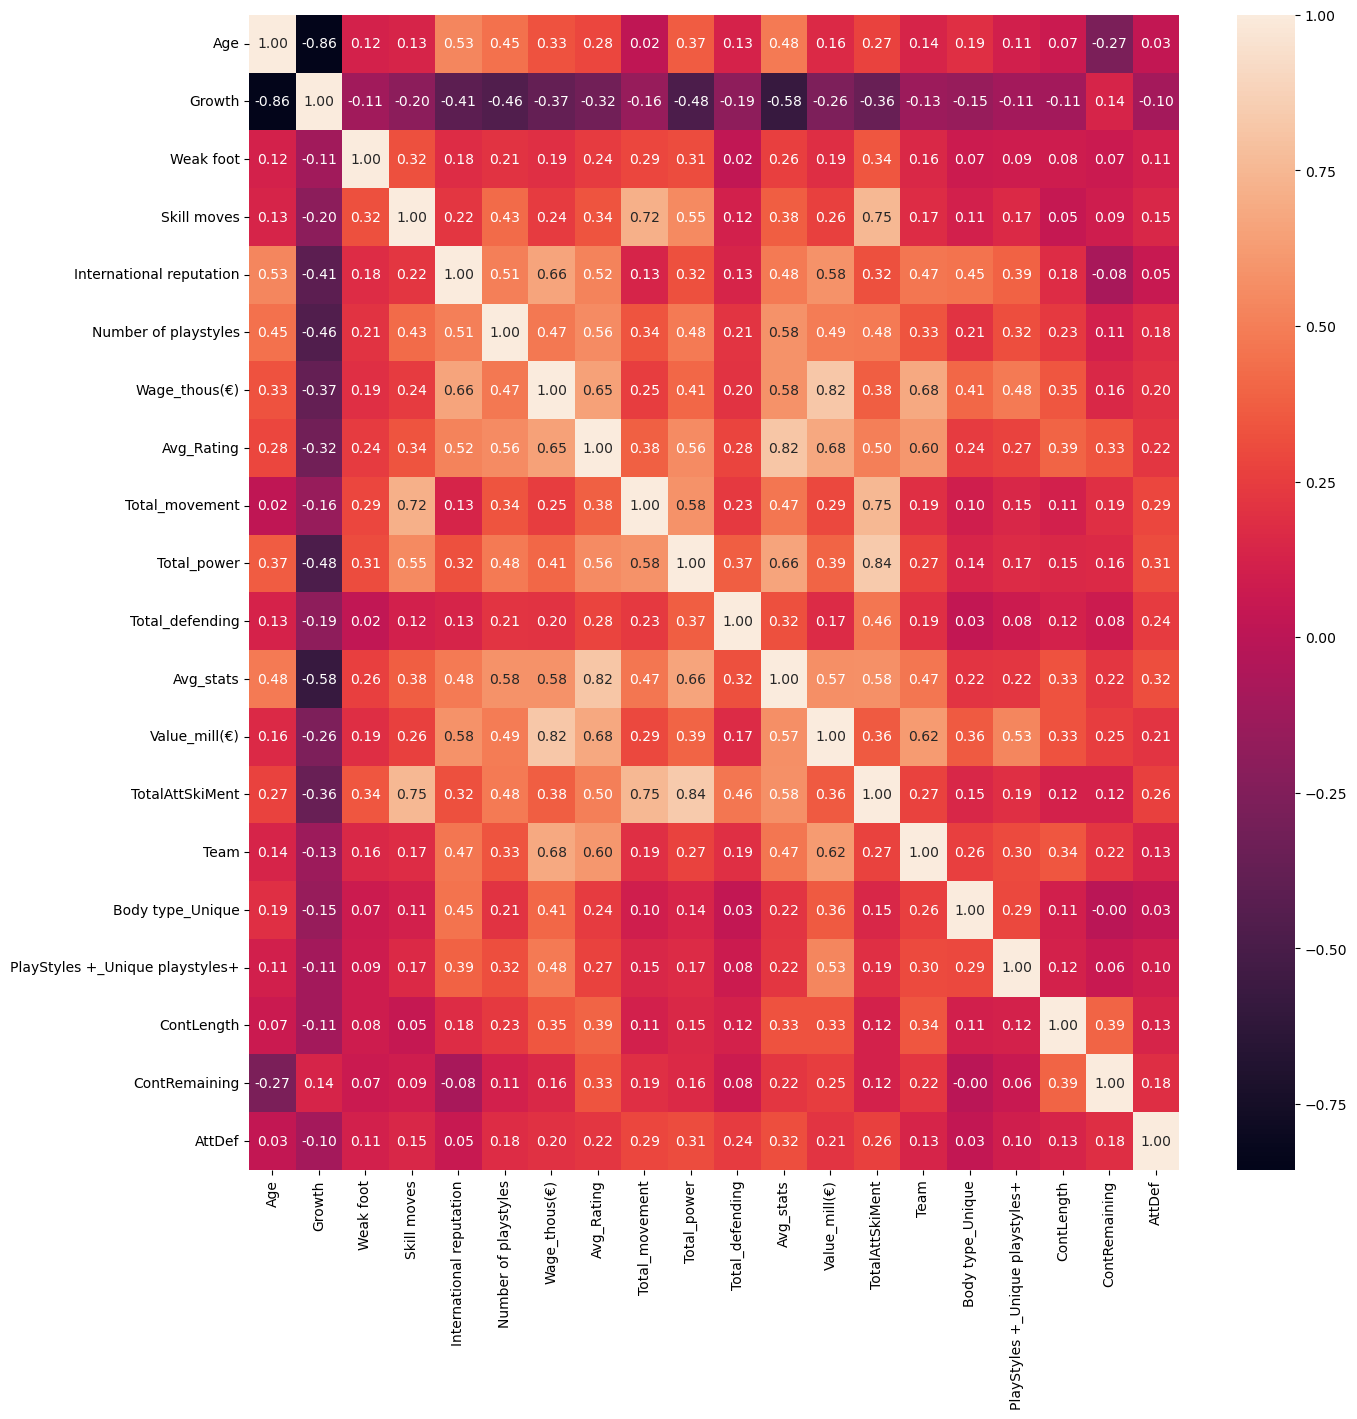

In [122]:
corr=Data_new.iloc[:,1:].corr()
print(corr['Value_mill(€)'])
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,fmt='.2f')

In [120]:
## VIF for data_num

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = Data_new.iloc[:,1:].columns
vif_data["VIF"] = [variance_inflation_factor(Data_new.iloc[:,1:].values, i) for i in range(Data_new.iloc[:,1:].shape[1])]

# Display the VIF data
print(vif_data)


                            Feature         VIF
0                               Age  110.478298
1                            Growth    9.122679
2                         Weak foot   23.104451
3                       Skill moves   35.222940
4          International reputation   14.132822
5              Number of playstyles    3.393820
6                     Wage_thous(€)    6.081545
7                        Avg_Rating  529.739586
8                    Total_movement  114.538248
9                       Total_power  159.861013
10                  Total_defending   10.611964
11                        Avg_stats  409.567830
12                    Value_mill(€)    5.722081
13                  TotalAttSkiMent  148.155306
14                             Team    3.633361
15                 Body type_Unique    1.357864
16  PlayStyles +_Unique playstyles+    1.548429
17                       ContLength    7.757902
18                    ContRemaining    4.789176
19                           AttDef   13

In [131]:
corr[corr['Value_mill(€)']>0.3]['Value_mill(€)']

International reputation           0.584031
Number of playstyles               0.492375
Wage_thous(€)                      0.819389
Avg_Rating                         0.675060
Total_power                        0.393980
Avg_stats                          0.568589
Value_mill(€)                      1.000000
TotalAttSkiMent                    0.357193
Team                               0.622236
Body type_Unique                   0.361240
PlayStyles +_Unique playstyles+    0.533279
ContLength                         0.332102
Name: Value_mill(€), dtype: float64

In [132]:
corr_features=corr[corr['Value_mill(€)']>0.3]['Value_mill(€)'].index
Data_new[corr_features]

International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      Avg_Rating  Total_power  Avg_stats  Value_mill(€)  TotalAttSkiMent  \
2365        69.5         61.6  54.000000          0.825        50.111111   
1772        76.5         57.6  59.500000          4.900        47.100000   
2219        73.0         63.2  54.333333          2.100        51.888889   
910         78.0         80.4  64.833333          9.000        61.422222   
4215        66.5         64.2  62.333333          0.975        58.477778   
...          ...          ...        ...            ...              ...   
4931        71.0         60.8  61.500000          2.300        56.188889   
3264        79.0         43.0  74.333333         11.500        22.800000   
1653        76.0         64.0  66.666667          3.300        62.755556   
2607        75.0         72.2  69.500000          3.500        60.000000   
2732        72.5         74.0  64.000000          2.900        58.088889   

           Team  Body type_Unique  PlayStyles +_Unique playstyles+  ContLength  
2365   1.412500                 0                                0           4  
1772   4.237500                 0                                0           4  
2219   3.100000                 0                                0           4  
910    7.350000                 0                                0           5  
4215   0.975000                 0                                0           2  
...         ...               ...                              ...         ...  
4931   1.125000                 0                                0           3  
3264  19.266667                 0                                0           8  
1653   4.393750                 0                                0           5  
2607   4.722222                 0                                0           5  
2732   5.626786                 0                                0           6  

[4543 rows x 12 columns]

In [133]:
## VIF for data_num

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = Data_new[corr_features].columns
vif_data["VIF"] = [variance_inflation_factor(Data_new[corr_features].values, i) for i in range(Data_new[corr_features].shape[1])]

# Display the VIF data
print(vif_data)


                            Feature         VIF
0          International reputation   10.477995
1              Number of playstyles    2.969480
2                     Wage_thous(€)    5.758636
3                        Avg_Rating  246.842298
4                       Total_power  139.109691
5                         Avg_stats  284.689910
6                     Value_mill(€)    4.466216
7                   TotalAttSkiMent   58.985206
8                              Team    3.504783
9                  Body type_Unique    1.350956
10  PlayStyles +_Unique playstyles+    1.498924
11                       ContLength    7.010799


In [135]:
## I am removing avg. stats

Data_corr=Data_new.copy()
Data_corr=Data_corr[corr_features]
Data_corr

International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      Avg_Rating  Total_power  Avg_stats  Value_mill(€)  TotalAttSkiMent  \
2365        69.5         61.6  54.000000          0.825        50.111111   
1772        76.5         57.6  59.500000          4.900        47.100000   
2219        73.0         63.2  54.333333          2.100        51.888889   
910         78.0         80.4  64.833333          9.000        61.422222   
4215        66.5         64.2  62.333333          0.975        58.477778   
...          ...          ...        ...            ...              ...   
4931        71.0         60.8  61.500000          2.300        56.188889   
3264        79.0         43.0  74.333333         11.500        22.800000   
1653        76.0         64.0  66.666667          3.300        62.755556   
2607        75.0         72.2  69.500000          3.500        60.000000   
2732        72.5         74.0  64.000000          2.900        58.088889   

           Team  Body type_Unique  PlayStyles +_Unique playstyles+  ContLength  
2365   1.412500                 0                                0           4  
1772   4.237500                 0                                0           4  
2219   3.100000                 0                                0           4  
910    7.350000                 0                                0           5  
4215   0.975000                 0                                0           2  
...         ...               ...                              ...         ...  
4931   1.125000                 0                                0           3  
3264  19.266667                 0                                0           8  
1653   4.393750                 0                                0           5  
2607   4.722222                 0                                0           5  
2732   5.626786                 0                                0           6  

[4543 rows x 12 columns]

In [136]:
Data_corr.drop(columns=['Avg_stats'],inplace=True)
Data_corr

International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      Avg_Rating  Total_power  Value_mill(€)  TotalAttSkiMent       Team  \
2365        69.5         61.6          0.825        50.111111   1.412500   
1772        76.5         57.6          4.900        47.100000   4.237500   
2219        73.0         63.2          2.100        51.888889   3.100000   
910         78.0         80.4          9.000        61.422222   7.350000   
4215        66.5         64.2          0.975        58.477778   0.975000   
...          ...          ...            ...              ...        ...   
4931        71.0         60.8          2.300        56.188889   1.125000   
3264        79.0         43.0         11.500        22.800000  19.266667   
1653        76.0         64.0          3.300        62.755556   4.393750   
2607        75.0         72.2          3.500        60.000000   4.722222   
2732        72.5         74.0          2.900        58.088889   5.626786   

      Body type_Unique  PlayStyles +_Unique playstyles+  ContLength  
2365                 0                                0           4  
1772                 0                                0           4  
2219                 0                                0           4  
910                  0                                0           5  
4215                 0                                0           2  
...                ...                              ...         ...  
4931                 0                                0           3  
3264                 0                                0           8  
1653                 0                                0           5  
2607                 0                                0           5  
2732                 0                                0           6  

[4543 rows x 11 columns]

In [137]:
## VIF for data_num

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = Data_corr.columns
vif_data["VIF"] = [variance_inflation_factor(Data_corr.values, i) for i in range(Data_corr.shape[1])]

# Display the VIF data
print(vif_data)


                            Feature         VIF
0          International reputation   10.447209
1              Number of playstyles    2.889613
2                     Wage_thous(€)    5.706994
3                        Avg_Rating   70.686065
4                       Total_power  127.506388
5                     Value_mill(€)    4.454381
6                   TotalAttSkiMent   58.916476
7                              Team    3.491768
8                  Body type_Unique    1.350639
9   PlayStyles +_Unique playstyles+    1.492226
10                       ContLength    6.995285


In [141]:
## I'm removing TotalPower
Data_corr.drop(columns=['Total_power'],inplace=True)
Data_corr

International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      Avg_Rating  Value_mill(€)  TotalAttSkiMent       Team  Body type_Unique  \
2365        69.5          0.825        50.111111   1.412500                 0   
1772        76.5          4.900        47.100000   4.237500                 0   
2219        73.0          2.100        51.888889   3.100000                 0   
910         78.0          9.000        61.422222   7.350000                 0   
4215        66.5          0.975        58.477778   0.975000                 0   
...          ...            ...              ...        ...               ...   
4931        71.0          2.300        56.188889   1.125000                 0   
3264        79.0         11.500        22.800000  19.266667                 0   
1653        76.0          3.300        62.755556   4.393750                 0   
2607        75.0          3.500        60.000000   4.722222                 0   
2732        72.5          2.900        58.088889   5.626786                 0   

      PlayStyles +_Unique playstyles+  ContLength  
2365                                0           4  
1772                                0           4  
2219                                0           4  
910                                 0           5  
4215                                0           2  
...                               ...         ...  
4931                                0           3  
3264                                0           8  
1653                                0           5  
2607                                0           5  
2732                                0           6  

[4543 rows x 10 columns]

In [142]:
corr=Data_corr.corr()
print(corr['Value_mill(€)'])

International reputation           0.584031
Number of playstyles               0.492375
Wage_thous(€)                      0.819389
Avg_Rating                         0.675060
Value_mill(€)                      1.000000
TotalAttSkiMent                    0.357193
Team                               0.622236
Body type_Unique                   0.361240
PlayStyles +_Unique playstyles+    0.533279
ContLength                         0.332102
Name: Value_mill(€), dtype: float64


In [143]:
corr[corr['Value_mill(€)']>0.35]['Value_mill(€)']

International reputation           0.584031
Number of playstyles               0.492375
Wage_thous(€)                      0.819389
Avg_Rating                         0.675060
Value_mill(€)                      1.000000
TotalAttSkiMent                    0.357193
Team                               0.622236
Body type_Unique                   0.361240
PlayStyles +_Unique playstyles+    0.533279
Name: Value_mill(€), dtype: float64

In [144]:
## VIF for data_num

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = Data_corr.columns
vif_data["VIF"] = [variance_inflation_factor(Data_corr.values, i) for i in range(Data_corr.shape[1])]

# Display the VIF data
print(vif_data)


                           Feature        VIF
0         International reputation  10.405194
1             Number of playstyles   2.885633
2                    Wage_thous(€)   5.657036
3                       Avg_Rating  37.092004
4                    Value_mill(€)   4.453668
5                  TotalAttSkiMent  25.091511
6                             Team   3.410645
7                 Body type_Unique   1.350547
8  PlayStyles +_Unique playstyles+   1.487185
9                       ContLength   6.990661


In [145]:
## I'm removing totalAtt..
Data_corr.drop(columns=['TotalAttSkiMent'],inplace=True)
Data_corr

International reputation  Number of playstyles  Wage_thous(€)  \
2365                         1                     0            0.7   
1772                         1                     0           21.0   
2219                         1                     2           25.0   
910                          1                     0           21.0   
4215                         1                     0            0.5   
...                        ...                   ...            ...   
4931                         1                     2            3.0   
3264                         2                     1           73.0   
1653                         1                     0            0.5   
2607                         1                     3            9.0   
2732                         1                     0           22.0   

      Avg_Rating  Value_mill(€)       Team  Body type_Unique  \
2365        69.5          0.825   1.412500                 0   
1772        76.5          4.900   4.237500                 0   
2219        73.0          2.100   3.100000                 0   
910         78.0          9.000   7.350000                 0   
4215        66.5          0.975   0.975000                 0   
...          ...            ...        ...               ...   
4931        71.0          2.300   1.125000                 0   
3264        79.0         11.500  19.266667                 0   
1653        76.0          3.300   4.393750                 0   
2607        75.0          3.500   4.722222                 0   
2732        72.5          2.900   5.626786                 0   

      PlayStyles +_Unique playstyles+  ContLength  
2365                                0           4  
1772                                0           4  
2219                                0           4  
910                                 0           5  
4215                                0           2  
...                               ...         ...  
4931                                0           3  
3264                                0           8  
1653                                0           5  
2607                                0           5  
2732                                0           6  

[4543 rows x 9 columns]

In [146]:
corr=Data_corr.corr()
corr[corr['Value_mill(€)']>0.35]['Value_mill(€)']

International reputation           0.584031
Number of playstyles               0.492375
Wage_thous(€)                      0.819389
Avg_Rating                         0.675060
Value_mill(€)                      1.000000
Team                               0.622236
Body type_Unique                   0.361240
PlayStyles +_Unique playstyles+    0.533279
Name: Value_mill(€), dtype: float64

In [147]:
## VIF for data_num

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = Data_corr.columns
vif_data["VIF"] = [variance_inflation_factor(Data_corr.values, i) for i in range(Data_corr.shape[1])]

# Display the VIF data
print(vif_data)


                           Feature        VIF
0         International reputation  10.399061
1             Number of playstyles   2.644373
2                    Wage_thous(€)   5.608423
3                       Avg_Rating  13.311302
4                    Value_mill(€)   4.443749
5                             Team   3.401639
6                 Body type_Unique   1.350529
7  PlayStyles +_Unique playstyles+   1.487182
8                       ContLength   6.911290


In [148]:
Data_corr=pd.DataFrame(pd.concat([X_train['Name'],Data_corr],axis=1))
Data_corr

Name  International reputation  Number of playstyles  \
2365  F. Soelle Soelle                         1                     0   
1772      A. Al Dakhil                         1                     0   
2219          S. Duffy                         1                     2   
910        Igor Thiago                         1                     0   
4215    23 C. Magallán                         1                     0   
...                ...                       ...                   ...   
4931       D. Cleonise                         1                     2   
3264          M. Perin                         2                     1   
1653      Marlon Gomes                         1                     0   
2607       J. Portillo                         1                     3   
2732      Oh Hyeon Gyu                         1                     0   

      Wage_thous(€)  Avg_Rating  Value_mill(€)       Team  Body type_Unique  \
2365            0.7        69.5          0.825   1.412500                 0   
1772           21.0        76.5          4.900   4.237500                 0   
2219           25.0        73.0          2.100   3.100000                 0   
910            21.0        78.0          9.000   7.350000                 0   
4215            0.5        66.5          0.975   0.975000                 0   
...             ...         ...            ...        ...               ...   
4931            3.0        71.0          2.300   1.125000                 0   
3264           73.0        79.0         11.500  19.266667                 0   
1653            0.5        76.0          3.300   4.393750                 0   
2607            9.0        75.0          3.500   4.722222                 0   
2732           22.0        72.5          2.900   5.626786                 0   

      PlayStyles +_Unique playstyles+  ContLength  
2365                                0           4  
1772                                0           4  
2219                                0           4  
910                                 0           5  
4215                                0           2  
...                               ...         ...  
4931                                0           3  
3264                                0           8  
1653                                0           5  
2607                                0           5  
2732                                0           6  

[4543 rows x 10 columns]

In [100]:
Data_new.to_csv('Data_new.csv')

In [149]:
Data_corr.to_csv('Data_corr.csv')